### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than $12500, $12500 - $24999, $25000 - $37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than $20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import textwrap

In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
pd.set_option('display.max_columns', None)
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

There are a lot of null values for the `car` field.

In [5]:
data['car'].unique()

array([nan, 'Scooter and motorcycle', 'crossover', 'Mazda5',
       'do not drive', 'Car that is too old to install Onstar :D'],
      dtype=object)

3. Decide what to do about your missing data -- drop, replace, other...

The values in the `car` column don't seem especially useful. Given that so many are missing, this column can be dropped with minimal anticipated data loss.
There are relatively few other missing values overall, it is likely safe to drop the rows where those values are missins.

In [6]:
data_cleaned = data.drop('car', axis=1)
print(data_cleaned.shape)

data_cleaned = data_cleaned.dropna()
print(data_cleaned.shape)

(12684, 25)
(12079, 25)


4. What proportion of the total observations chose to accept the coupon? 



In [7]:
print(f"Accepted coupon proportion: {data_cleaned['Y'].mean() * 100:.2f}%")

Accepted coupon proportion: 56.93%


5. Use a bar plot to visualize the `coupon` column.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Coffee House'),
  Text(1, 0, 'Restaurant(<20)'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

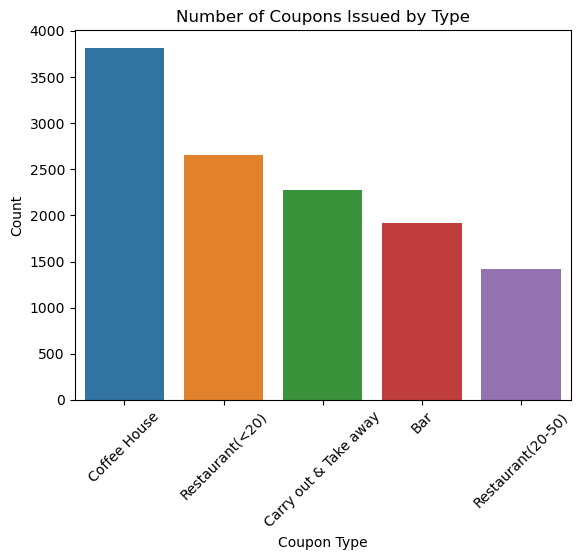

In [8]:
sns.barplot(x=data_cleaned['coupon'].value_counts().index, y=data_cleaned['coupon'].value_counts())
plt.title('Number of Coupons Issued by Type')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

6. Use a histogram to visualize the temperature column.

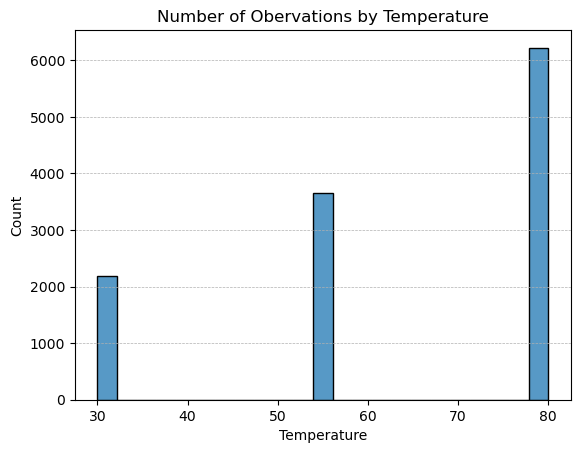

In [9]:
sns.histplot(data_cleaned['temperature'], kde=False)
plt.title('Number of Obervations by Temperature')
plt.xlabel('Temperature')
plt.grid(axis='y', which='both', linestyle='--', linewidth=0.5)

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [10]:
bar_coupons = data_cleaned[data_cleaned['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?

In [11]:
print(f"Accepted bar coupon proportion: {bar_coupons['Y'].mean() * 100:.2f}%")

Accepted bar coupon proportion: 41.19%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


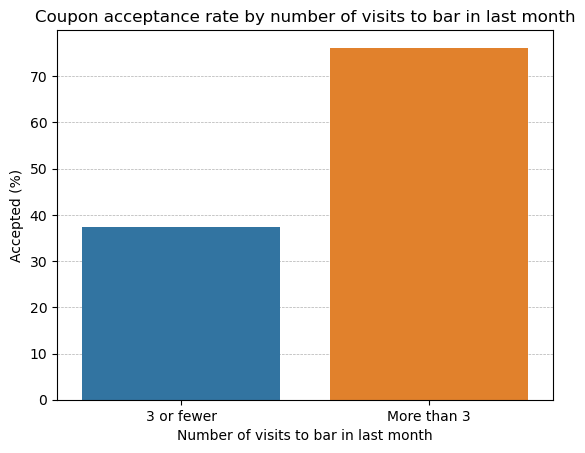

In [12]:
bar_coupons['Bar'].unique()
# => ['never' 'less1' '1~3' 'gt8' '4~8']
three_or_fewer = bar_coupons.query('Bar == "never" or Bar == "less1" or Bar == "1~3"')['Y'].value_counts(normalize=True)[1]*100
more_than_three = bar_coupons.query('Bar == "4~8" or Bar == "gt8"')['Y'].value_counts(normalize=True)[1]*100
sns.barplot(x=['3 or fewer', 'More than 3'], y=[three_or_fewer, more_than_three], zorder=2)
plt.title('Coupon acceptance rate by number of visits to bar in last month')
plt.ylabel('Accepted (%)')
plt.xlabel('Number of visits to bar in last month')
plt.grid(axis='y', which='both', linestyle='--', linewidth=0.5)

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others. Is there a difference?


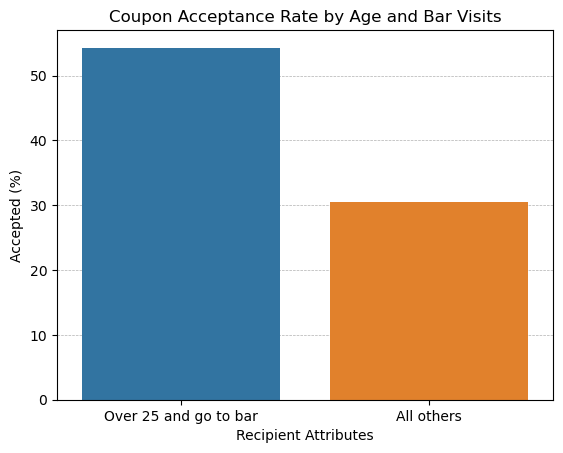

In [13]:
over_26_bar_goers_pct = bar_coupons.query('Bar != "never" and age >= "26"')['Y'].mean()*100
all_others_pct = bar_coupons.query('Bar == "never" or age < "26"')['Y'].mean()*100
sns.barplot(x=['Over 25 and go to bar', 'All others'], y=[over_26_bar_goers_pct, all_others_pct], zorder=2)
plt.title('Coupon Acceptance Rate by Age and Bar Visits')
plt.ylabel('Accepted (%)')
plt.xlabel('Recipient Attributes')
plt.grid(axis='y', which='both', linestyle='--', linewidth=0.5)

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.

Text(-0.3, -12, '*Drivers who went to bars more than once a month, had adult\npassengers, and did not work in farming, fishing, or forestry')

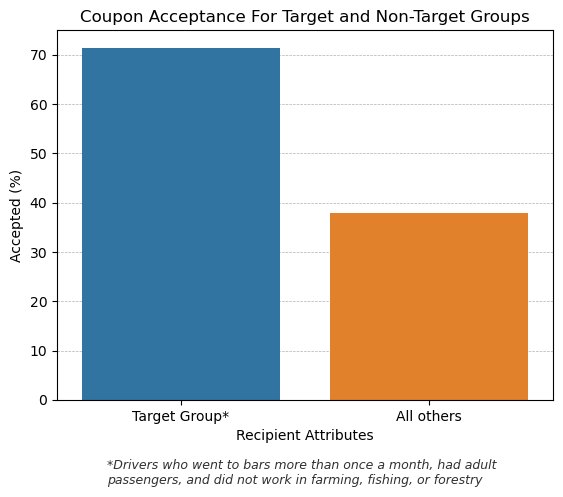

In [14]:
target_group = bar_coupons[
    (bar_coupons['Bar'] != 'never') &
    (bar_coupons['Bar'] != 'less1') &
    (bar_coupons['passanger'].isin(['Friend(s)', 'Partner'])) &
    (bar_coupons['occupation'] != 'Farming Fishing & Forestry')
]
target_group_pct = target_group['Y'].mean()*100

all_others = bar_coupons[~bar_coupons.index.isin(target_group.index)]
all_others_pct = all_others['Y'].mean()*100

sns.barplot(x=['Target Group*', 'All others'], y=[target_group_pct, all_others_pct], zorder=2)

plt.title('Coupon Acceptance For Target and Non-Target Groups')
plt.ylabel('Accepted (%)')
plt.xlabel('Recipient Attributes')
footnote = '*Drivers who went to bars more than once a month, had adult passengers, and did not work in farming, fishing, or forestry'
wrapped_footnote = textwrap.fill(footnote, width=70)
plt.grid(axis='y', which='both', linestyle='--', linewidth=0.5)
plt.text(x=-0.3, y=-12, s=wrapped_footnote, ha='left', va='top', fontsize=9, color='#303030', fontdict={'style': 'italic'})

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



Index([   90,   101,   105,   112,   123,   127,   156,   167,   171,   224,
       ...
       12426, 12481, 12482, 12485, 12488, 12500, 12525, 12526, 12529, 12544],
      dtype='int64', length=631)


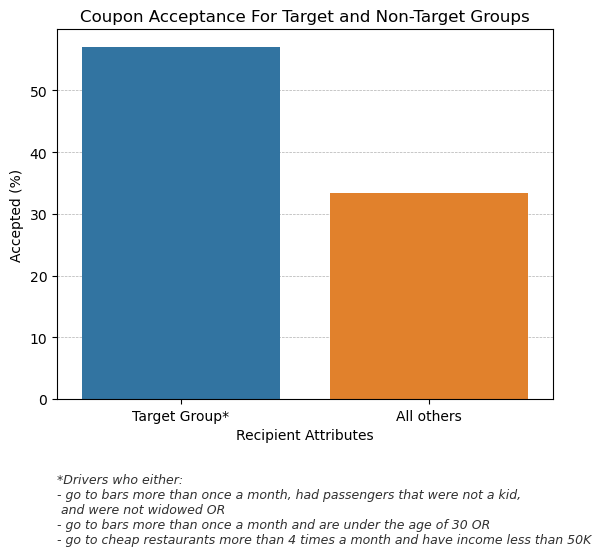

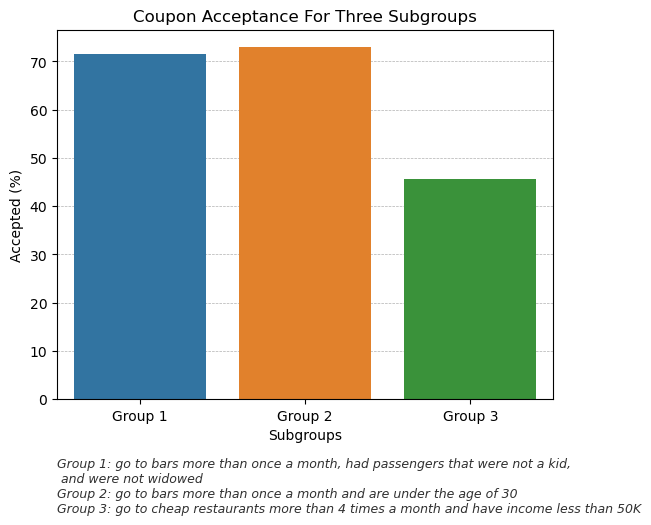

In [15]:
goes_to_bar_more_than_once_per_month = (bar_coupons['Bar'] != 'never') & (bar_coupons['Bar'] != 'less1')
non_child_passengers = bar_coupons['passanger'].isin(['Friend(s)', 'Partner'])
is_widowed = bar_coupons['maritalStatus'] == 'Widowed'
under_age_30 = bar_coupons['age'] < '30'
favors_inexpensive_restaurants = bar_coupons['RestaurantLessThan20'].isin(['4~8', 'gt8'])
income_under_50K = bar_coupons['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])

# sanity check to raise error if no rows match the condition
filters_dict = {
    'goes_to_bar_more_than_once_per_month': goes_to_bar_more_than_once_per_month,
    'non_child_passengers': non_child_passengers,
    'is_widowed': is_widowed,
    'under_age_30': under_age_30,
    'favors_inexpensive_restaurants': favors_inexpensive_restaurants,
    'income_under_50K': income_under_50K
}

for filter_name, filter_series in filters_dict.items():
    if filter_series.sum() == 0:
        raise ValueError(f"No rows match the condition for {filter_name}.")

target_group = bar_coupons[
    (
        (goes_to_bar_more_than_once_per_month & non_child_passengers & ~is_widowed) |
        (goes_to_bar_more_than_once_per_month & under_age_30) |
        (favors_inexpensive_restaurants & income_under_50K)
    )
]
target_group_pct = target_group['Y'].mean()*100

print(target_group.index)

all_others = bar_coupons[~bar_coupons.index.isin(target_group.index)]
all_others_pct = all_others['Y'].mean()*100

# zorder to bring the bars in front of the grid lines
sns.barplot(x=['Target Group*', 'All others'], y=[target_group_pct, all_others_pct], zorder=2)

plt.title('Coupon Acceptance For Target and Non-Target Groups')
plt.ylabel('Accepted (%)')
plt.xlabel('Recipient Attributes')
footnote = ('*Drivers who either:\n'
            '- go to bars more than once a month, had passengers that were not a kid,\n and were not widowed OR\n'
            '- go to bars more than once a month and are under the age of 30 OR\n'
            '- go to cheap restaurants more than 4 times a month and have income less than 50K')
plt.grid(axis='y', which='both', linestyle='--', linewidth=0.5)
plt.text(x=-0.5, y=-12, s=footnote, ha='left', va='top', fontsize=9, color='#303030', fontdict={'style': 'italic'})

plt.show()

# alternate interpretation of target groups
group1 = bar_coupons[(goes_to_bar_more_than_once_per_month & non_child_passengers & ~is_widowed)]
group2 = bar_coupons[(goes_to_bar_more_than_once_per_month & under_age_30)]
group3 = bar_coupons[(favors_inexpensive_restaurants & income_under_50K)]

group1_pct = group1['Y'].mean()*100
group2_pct = group2['Y'].mean()*100
group3_pct = group3['Y'].mean()*100

sns.barplot(x=['Group 1', 'Group 2', 'Group 3'], y=[group1_pct, group2_pct, group3_pct], zorder=2)
plt.title('Coupon Acceptance For Three Subgroups')
plt.ylabel('Accepted (%)')
plt.xlabel('Subgroups')
footnote = ('Group 1: go to bars more than once a month, had passengers that were not a kid,\n and were not widowed\n'
            'Group 2: go to bars more than once a month and are under the age of 30\n'
            'Group 3: go to cheap restaurants more than 4 times a month and have income less than 50K')
plt.grid(axis='y', which='both', linestyle='--', linewidth=0.5)
plt.text(x=-0.5, y=-12, s=footnote, ha='left', va='top', fontsize=9, color='#303030', fontdict={'style': 'italic'})

plt.show()


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

There may be higher rates of acceptance of bar coupons among those who have already demonstrated a preference for going to bars, have a higher level of income, and don't have children with them. Relationship status may also be a factor.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [16]:
data_cleaned['coupon'].unique()

array(['Restaurant(<20)', 'Coffee House', 'Bar', 'Carry out & Take away',
       'Restaurant(20-50)'], dtype=object)

In [17]:
data_cleaned['passenger'] = data_cleaned['passanger']
data_cleaned = data_cleaned.drop('passanger', axis=1)
coffee_house_coupons = data_cleaned[data_cleaned['coupon'] == 'Coffee House']
coffee_house_coupons.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,3816.000000,3816.000000,3816.0,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000
mean,68.096174,0.381551,1.0,0.519392,0.078092,0.187631,0.812369,0.496331
std,15.934365,0.485831,0.0,0.499689,0.268352,0.390468,0.390468,0.500052
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,0.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
(coffee_house_coupons['Y'].mean()*100).round(1)

49.6

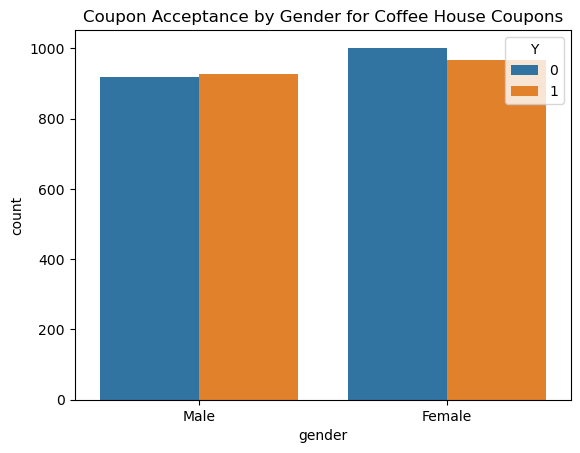

In [19]:
sns.countplot(x='gender', hue='Y', data=coffee_house_coupons)
plt.title('Coupon Acceptance by Gender for Coffee House Coupons')
plt.show()

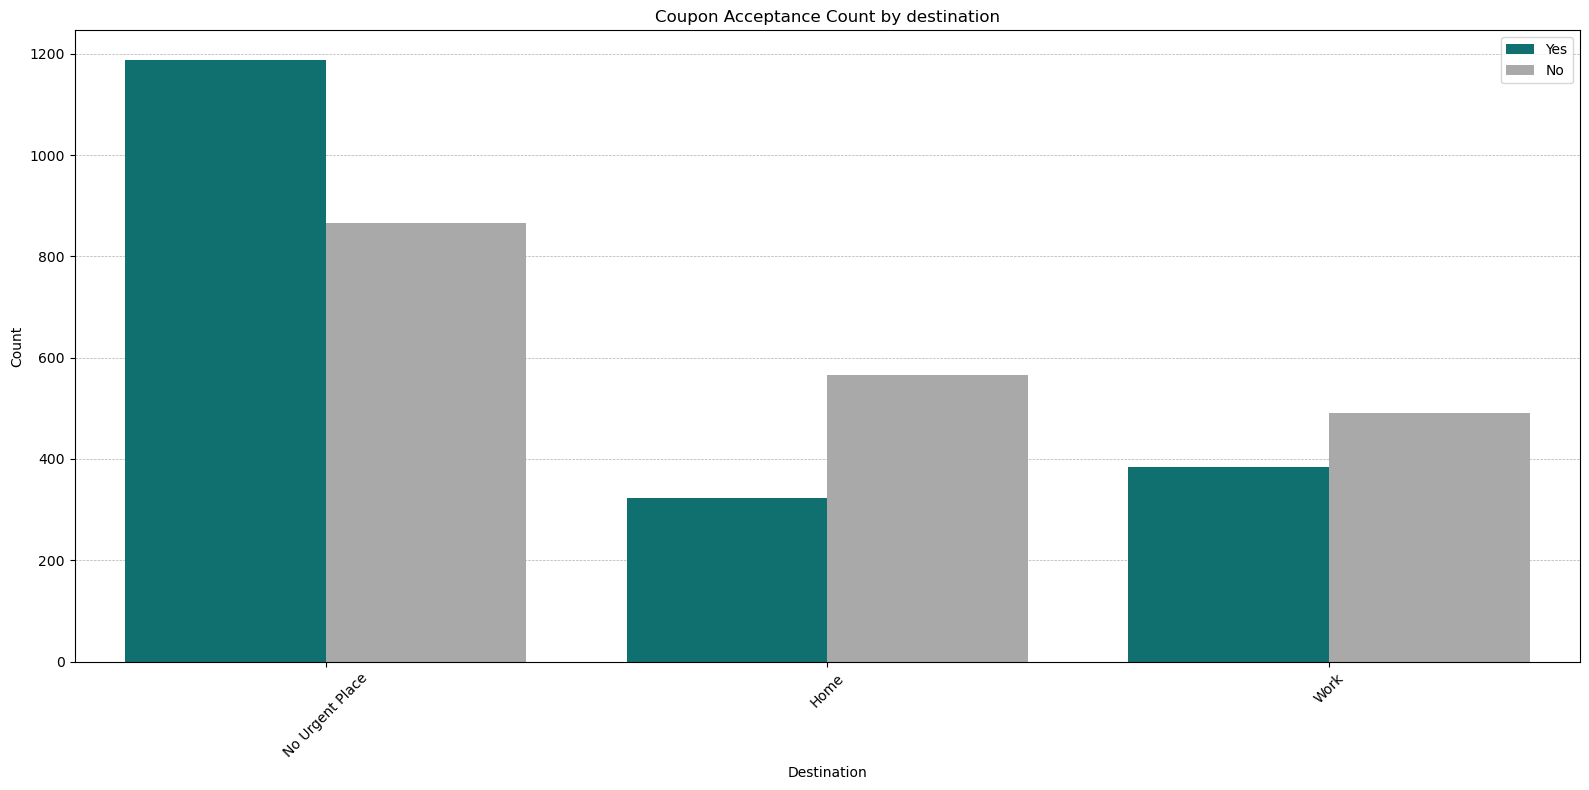

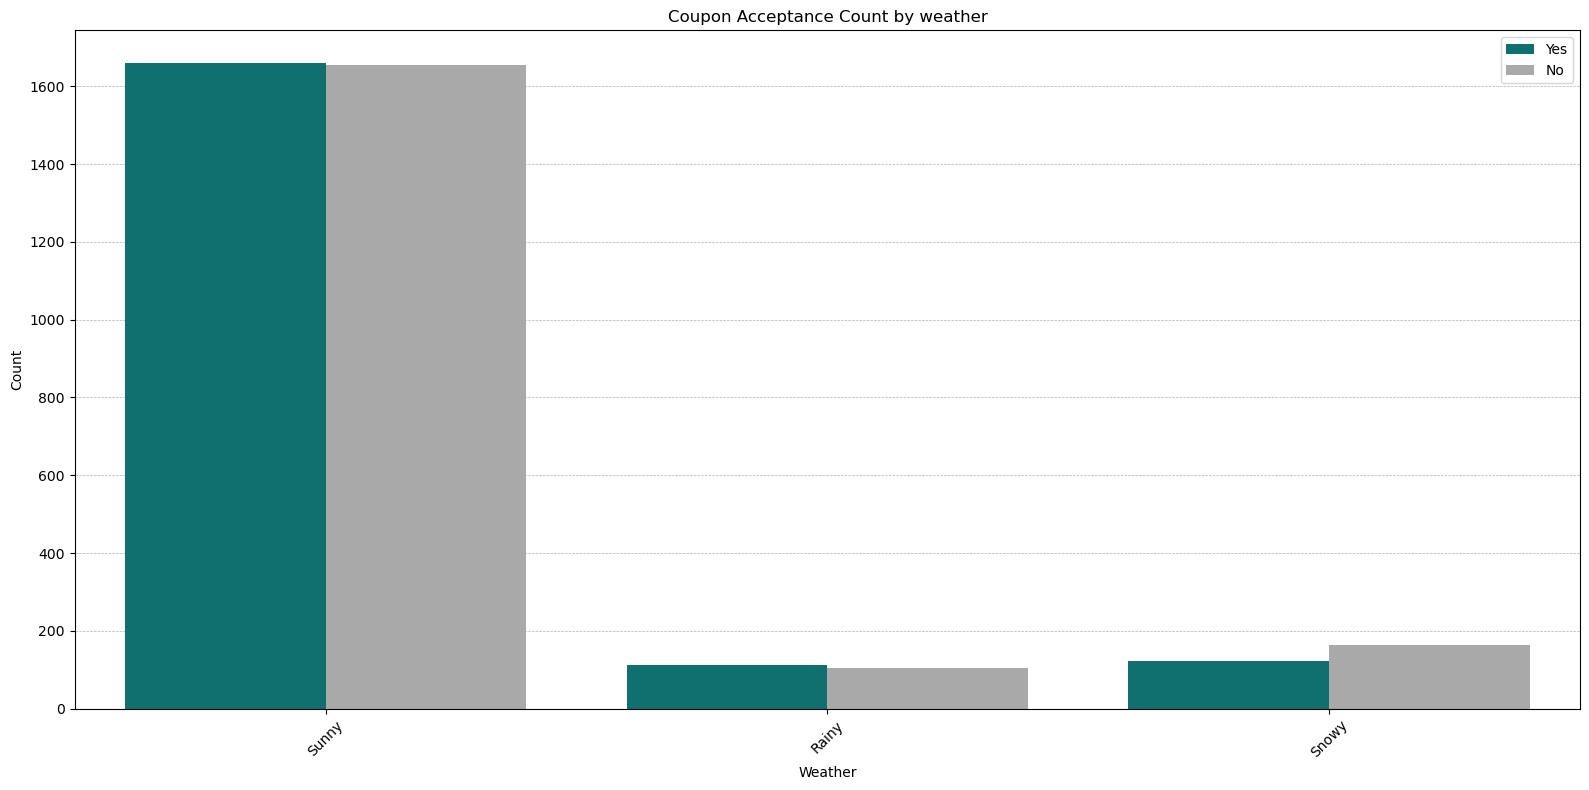

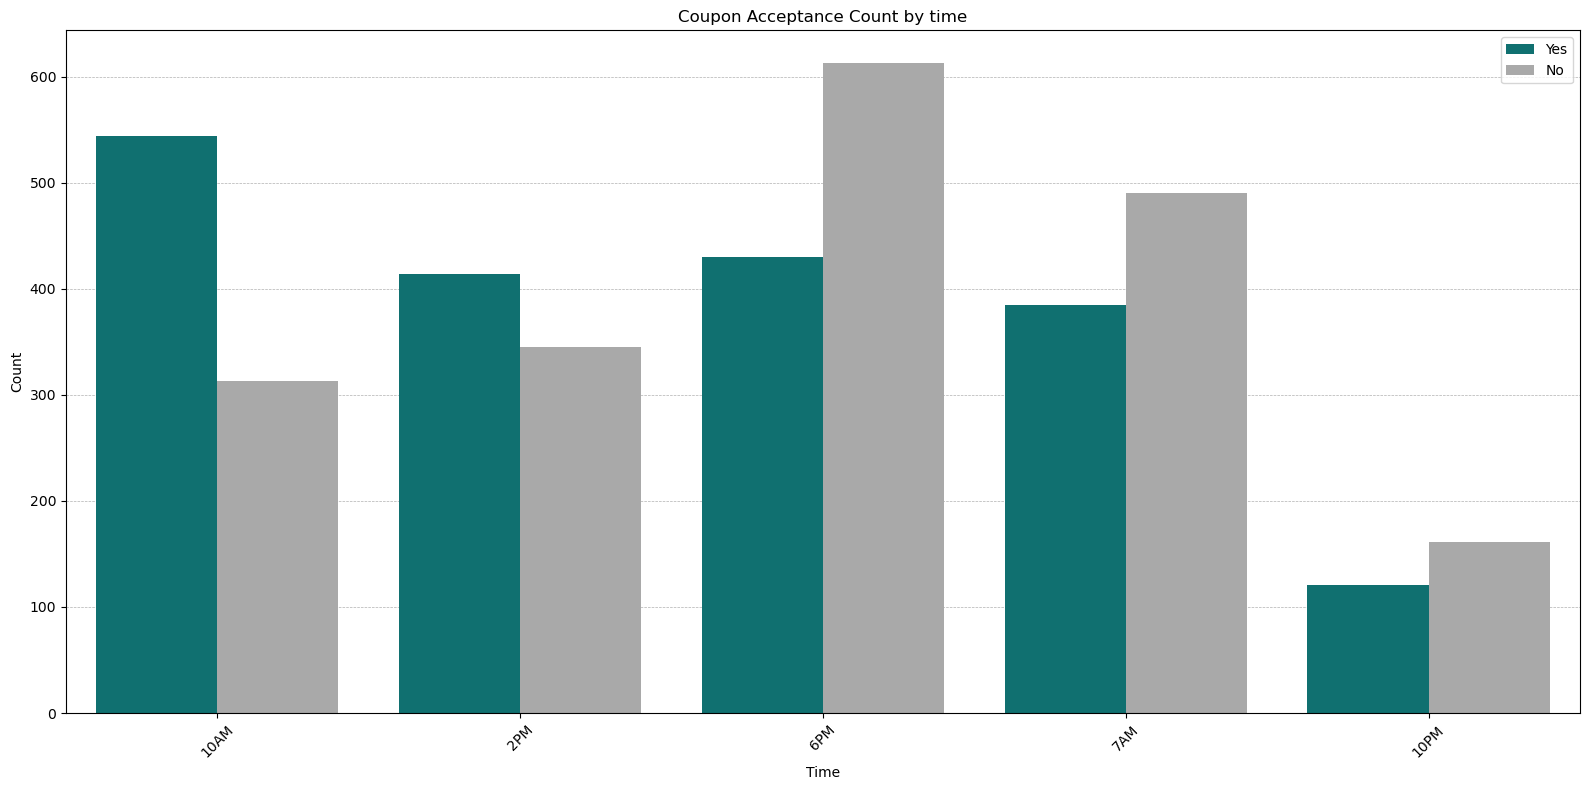

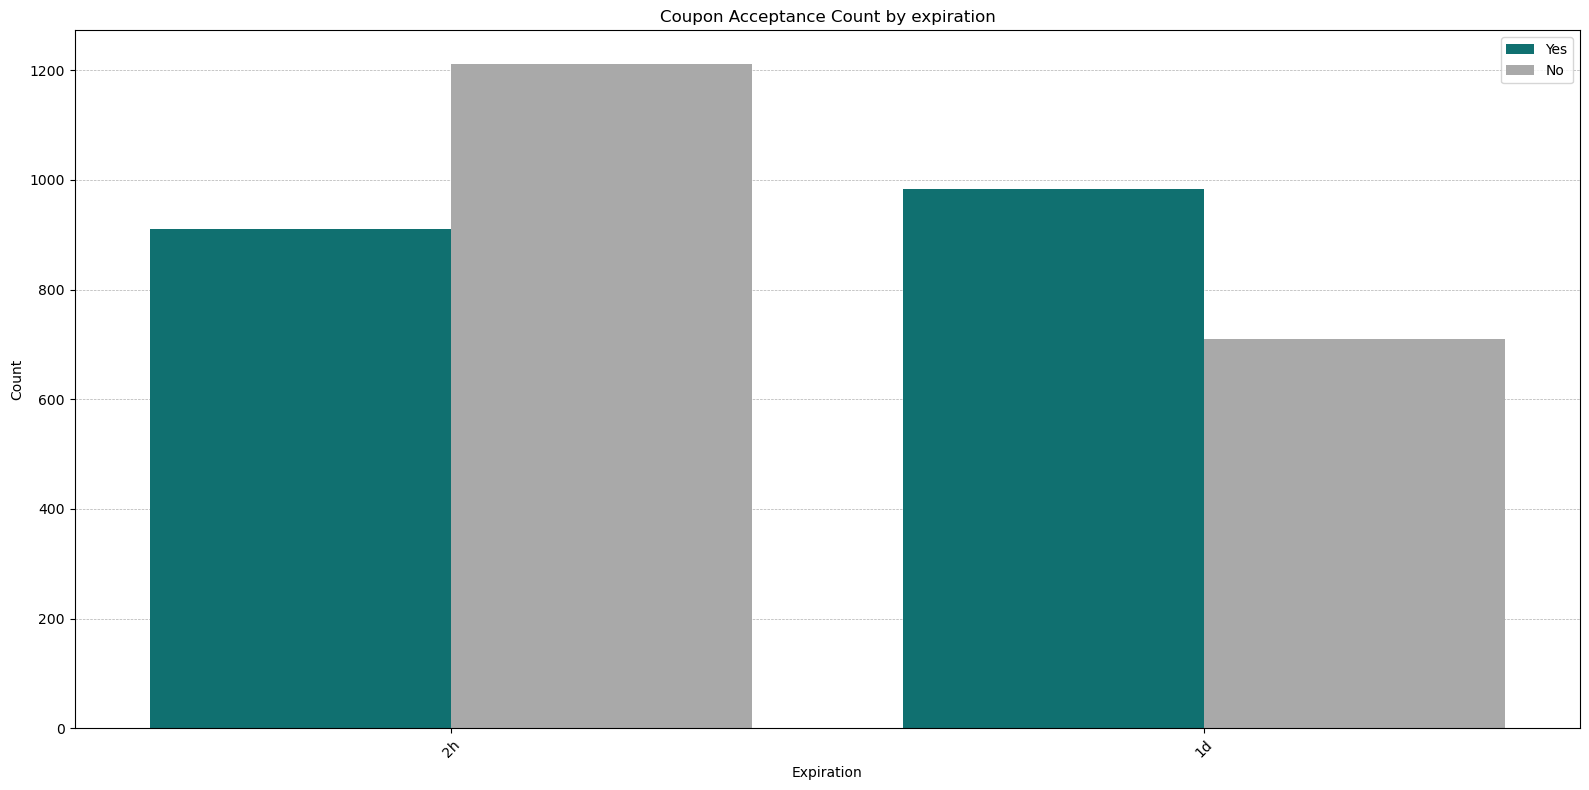

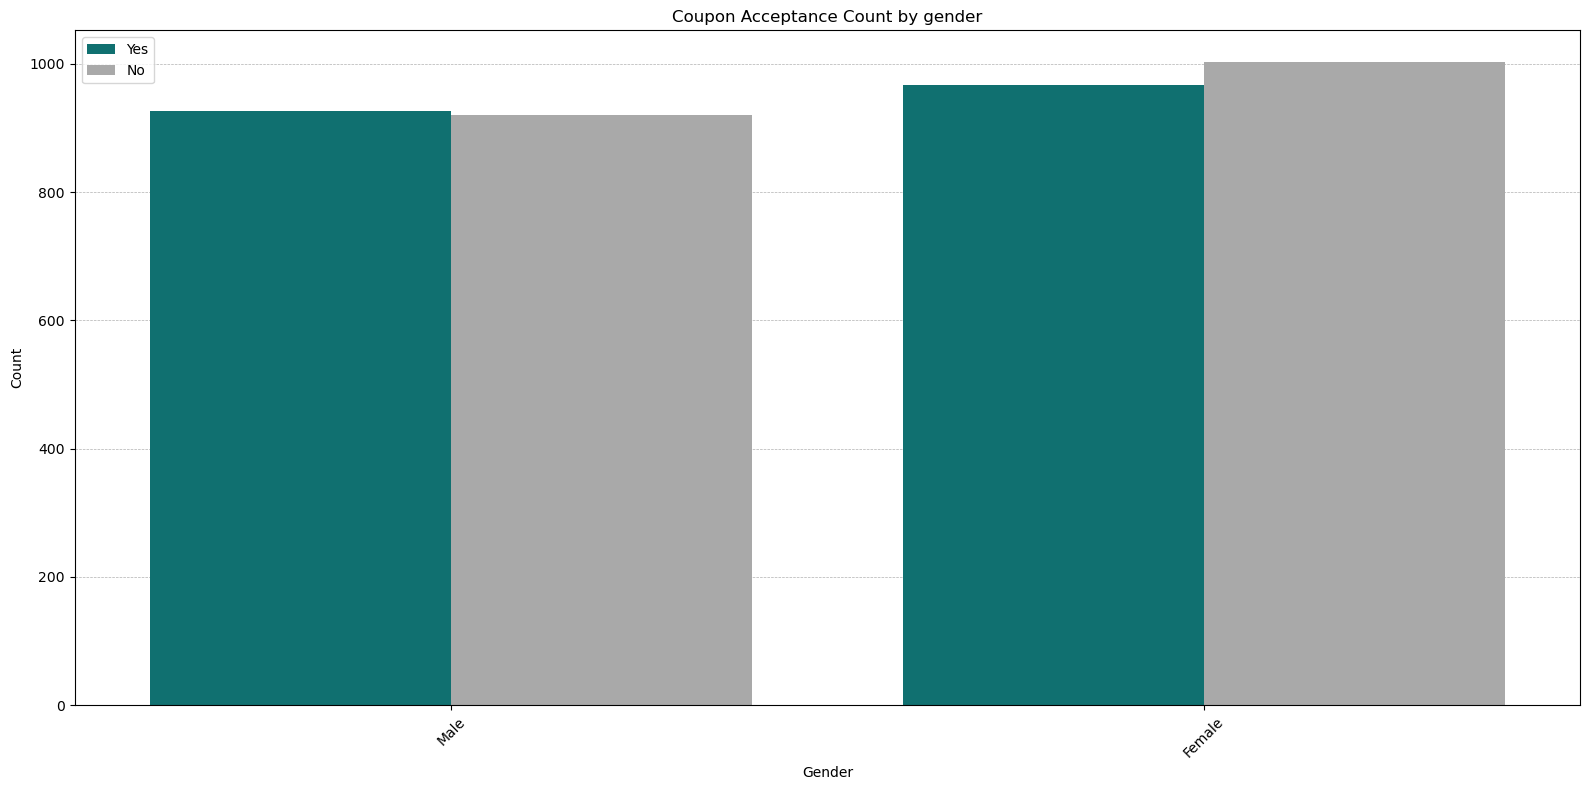

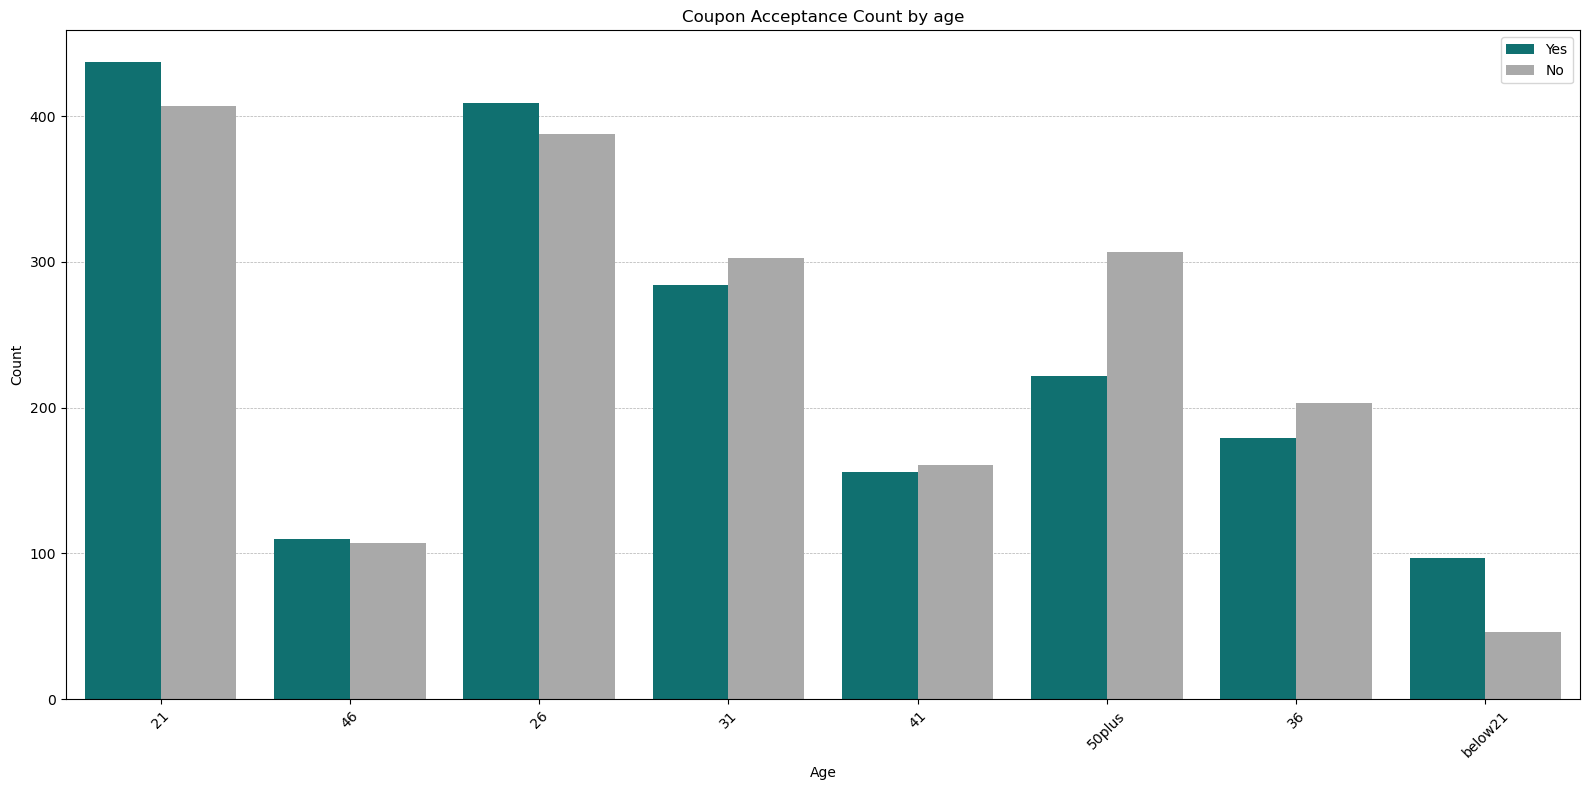

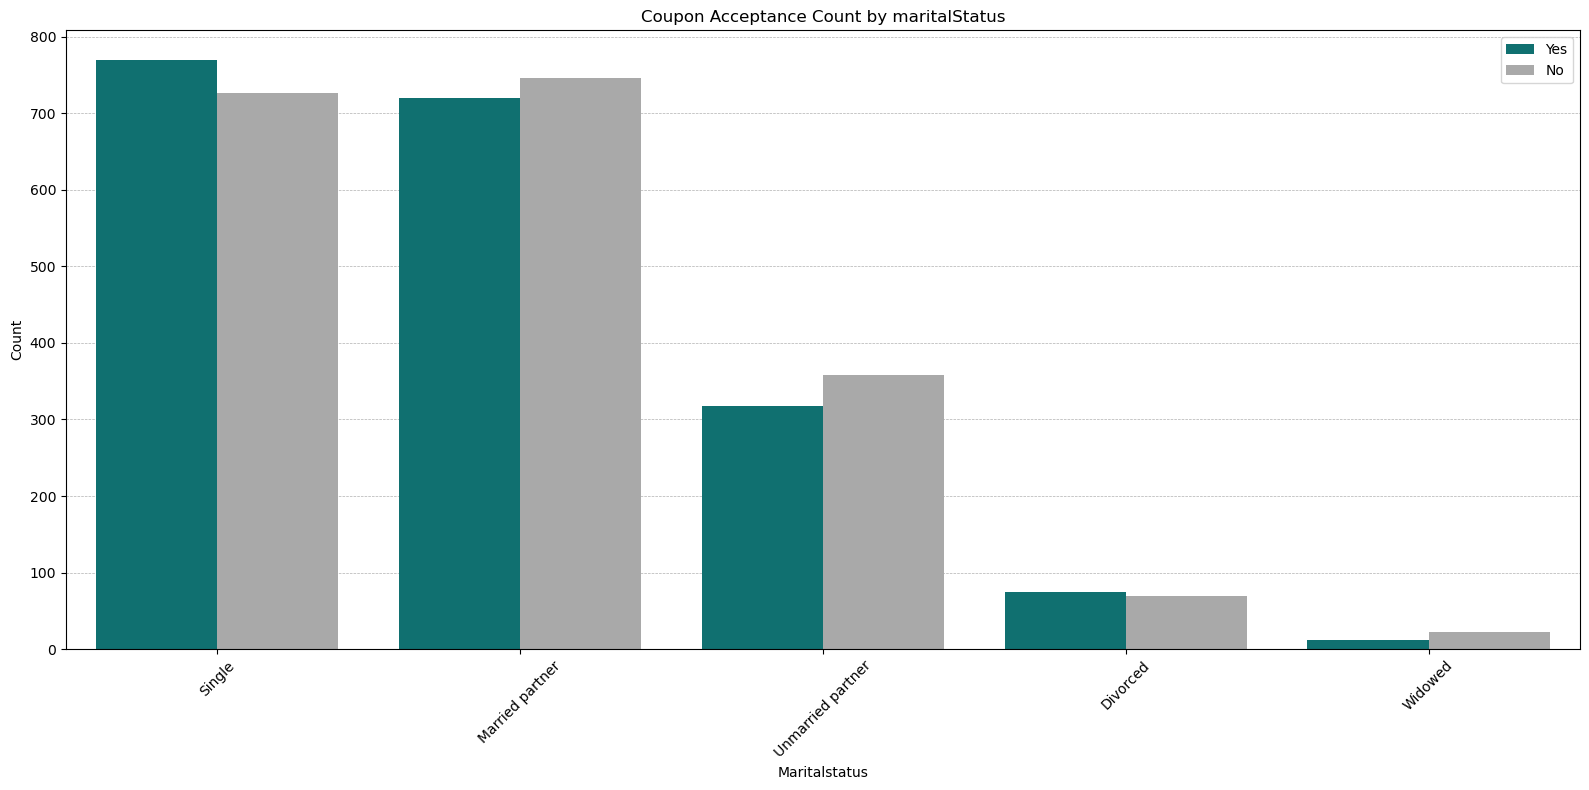

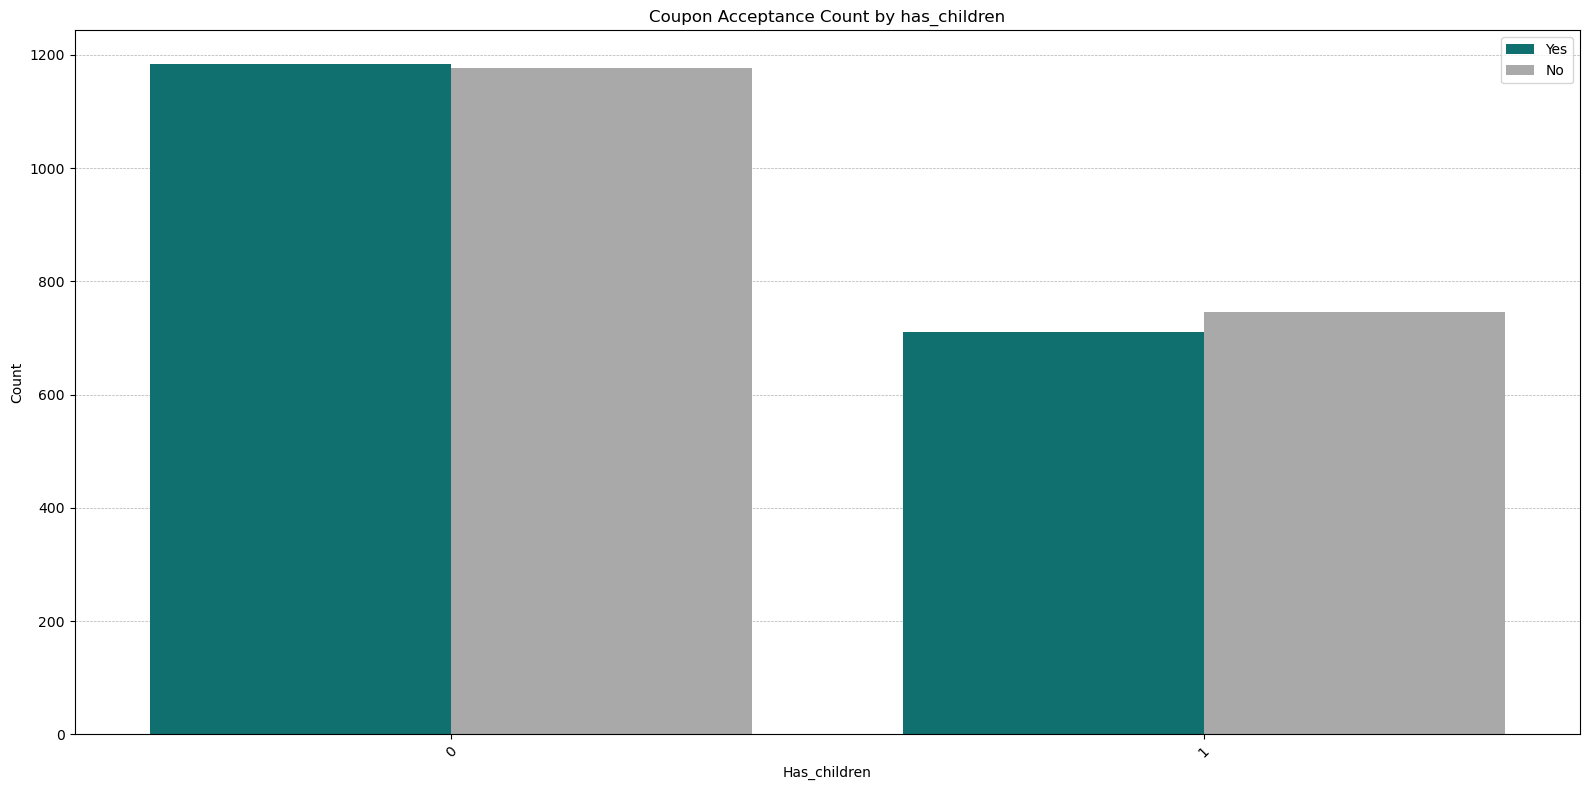

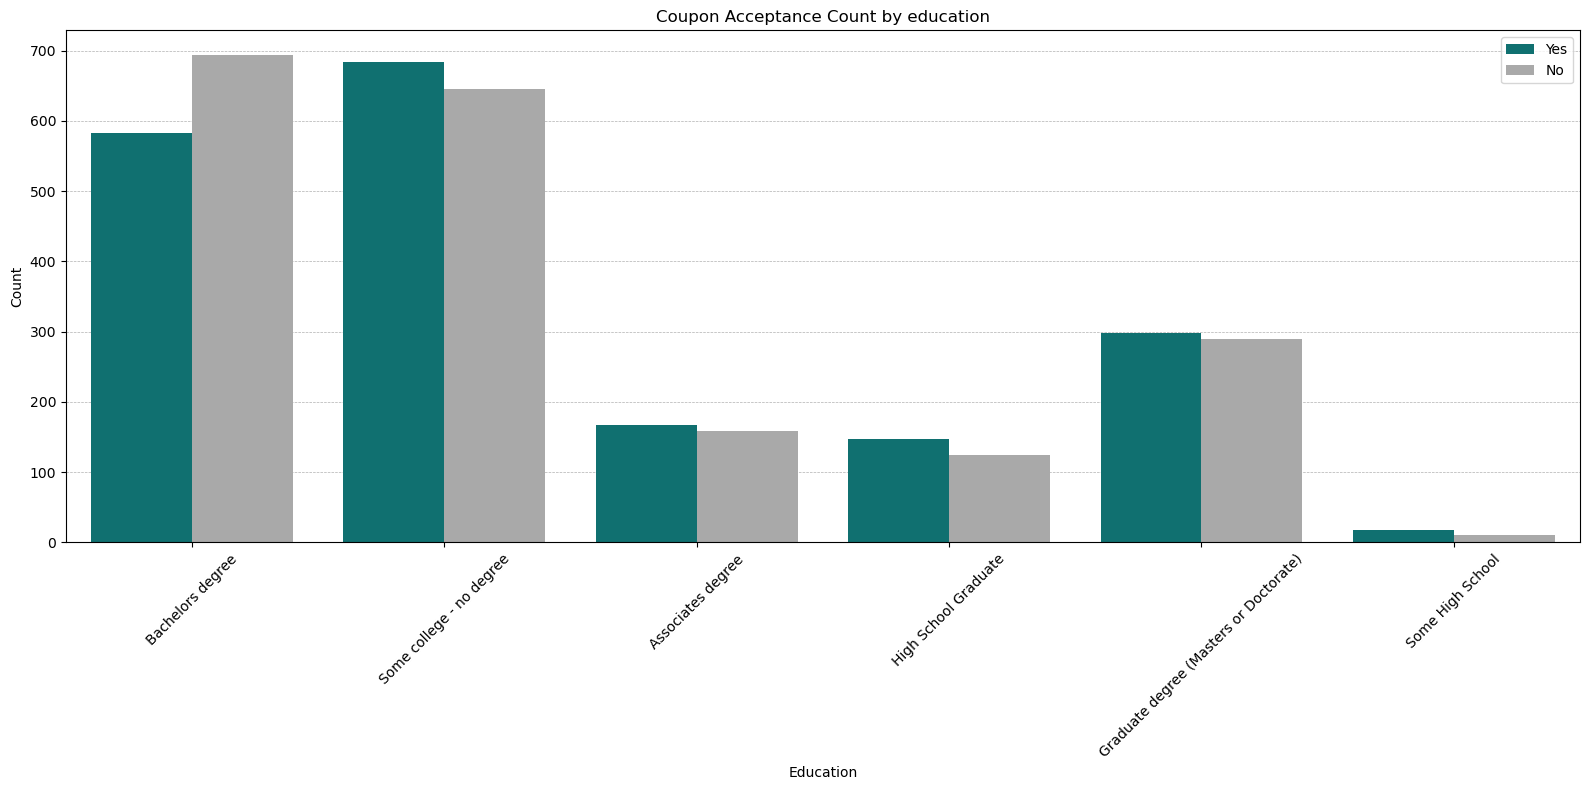

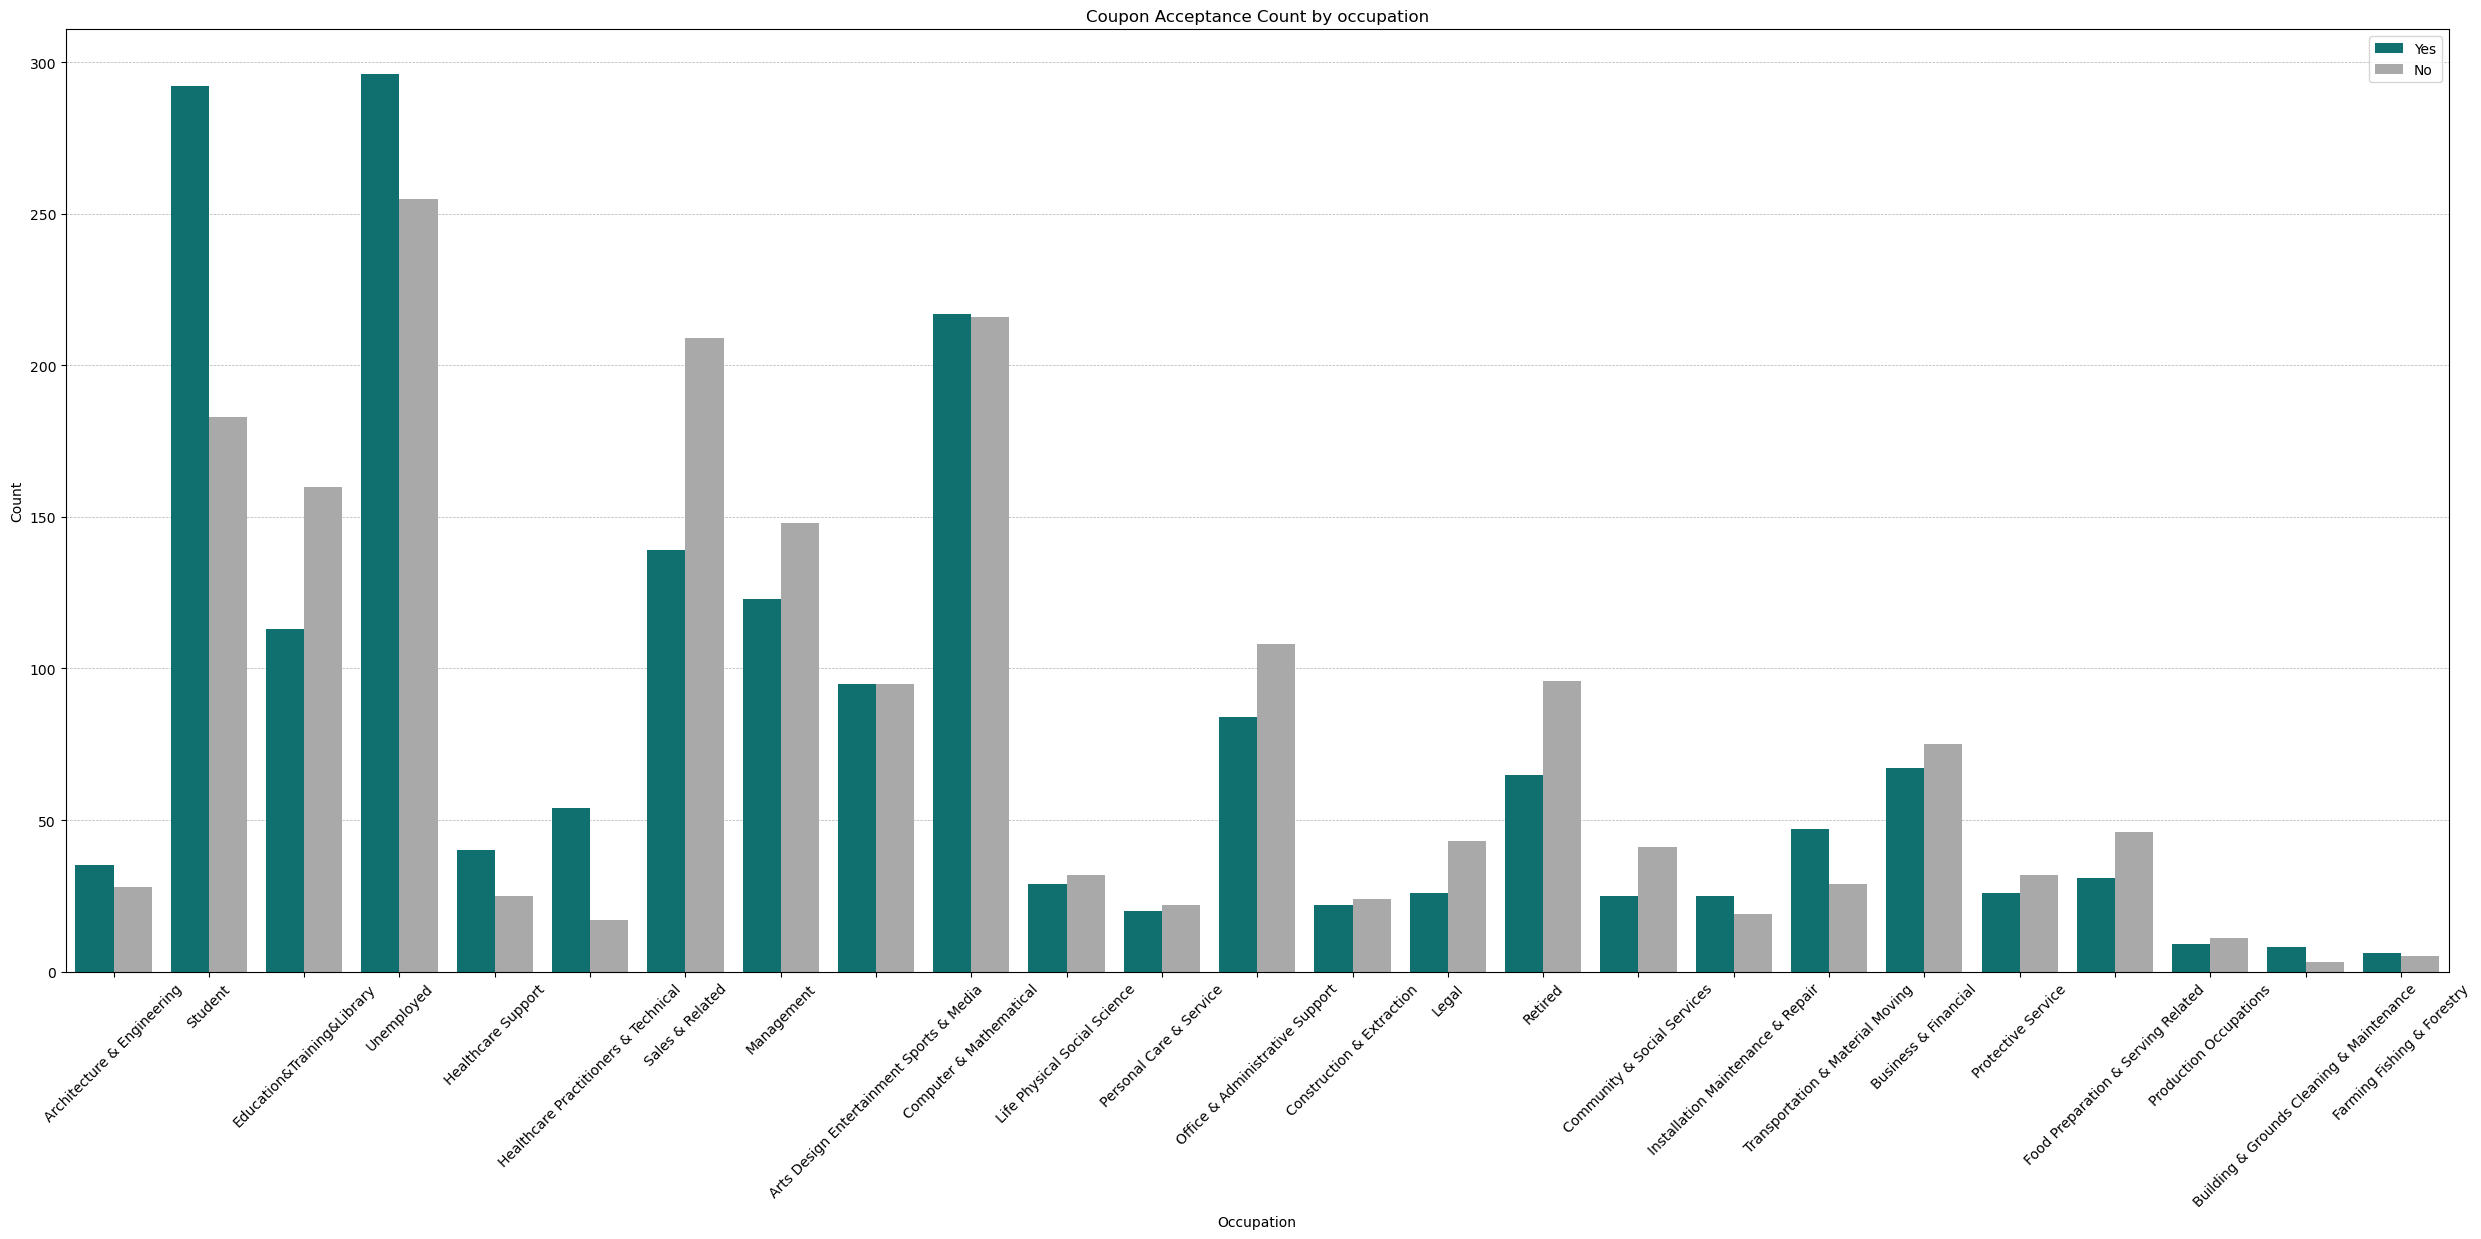

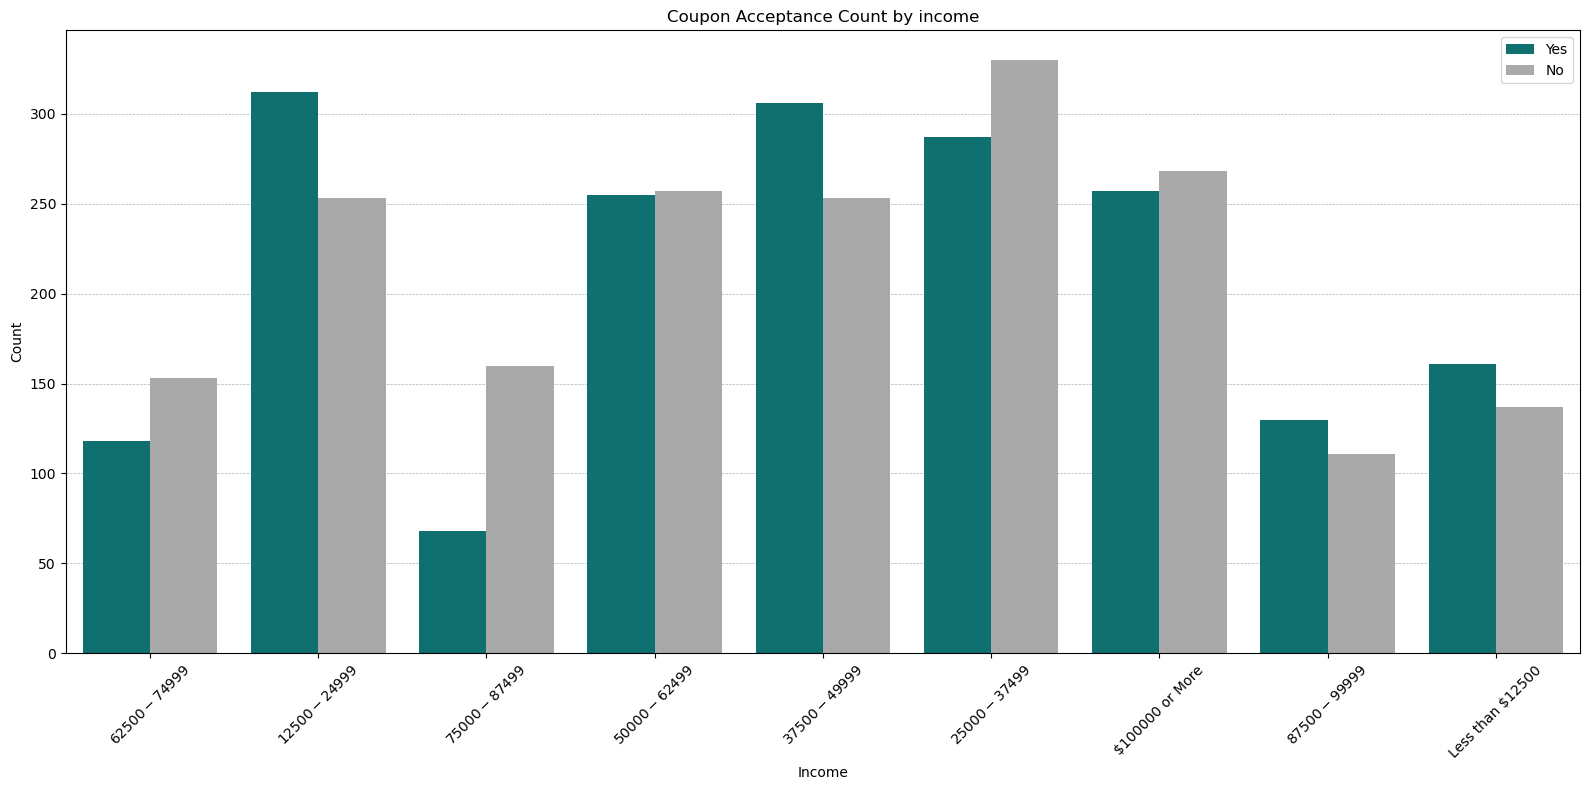

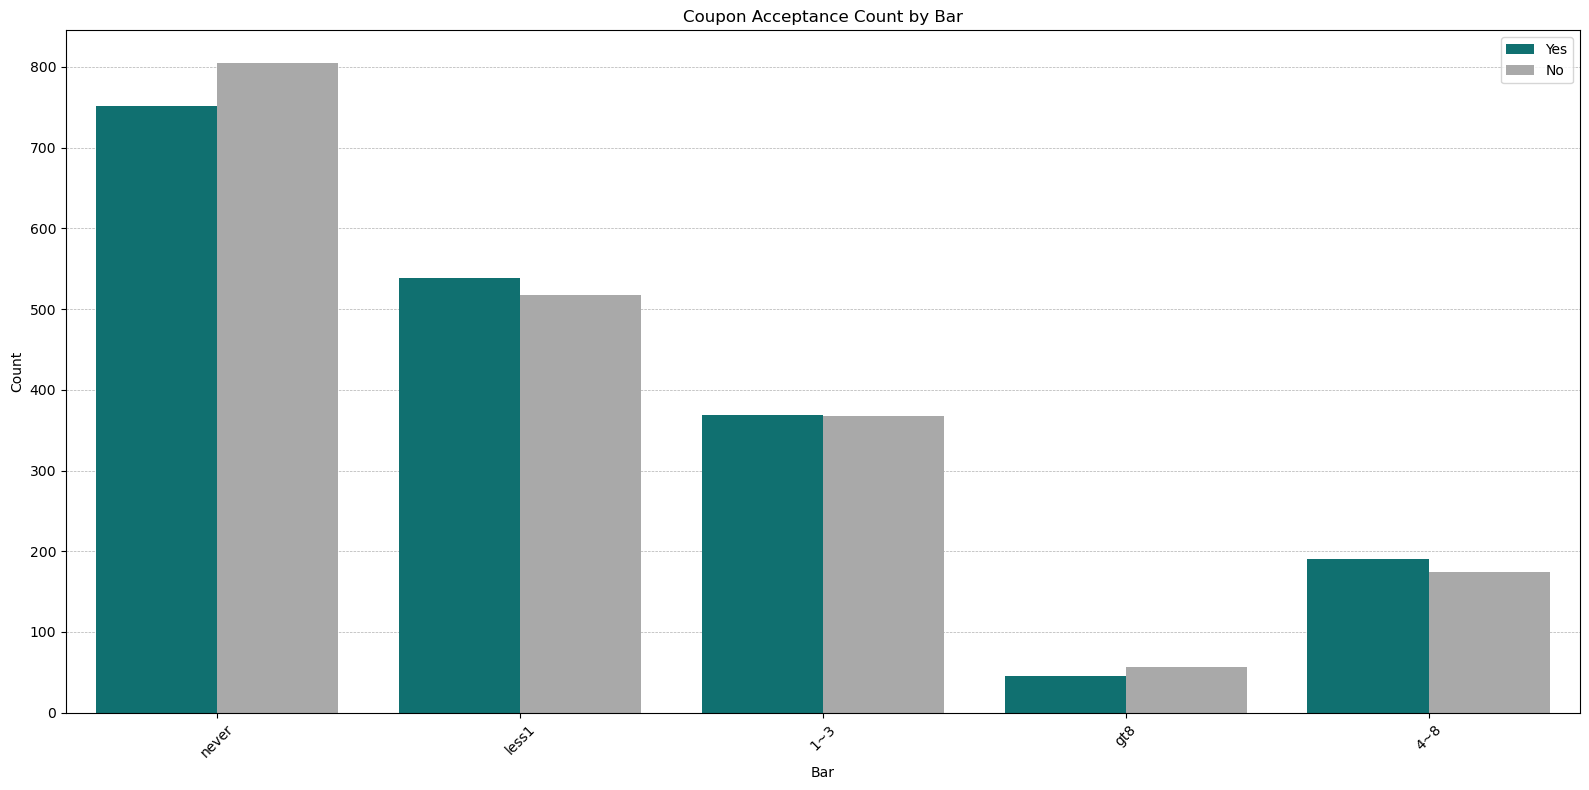

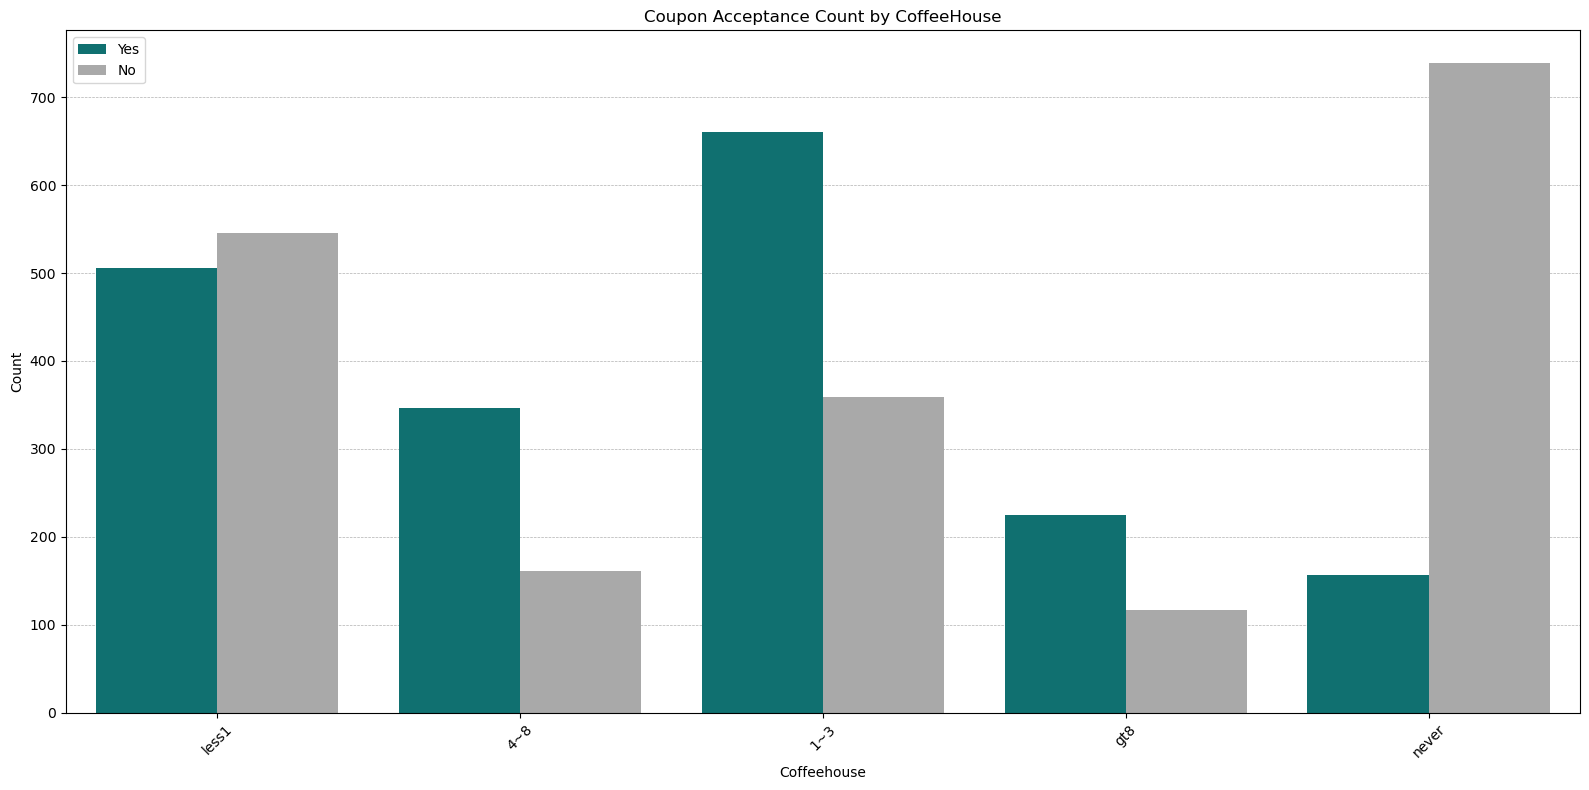

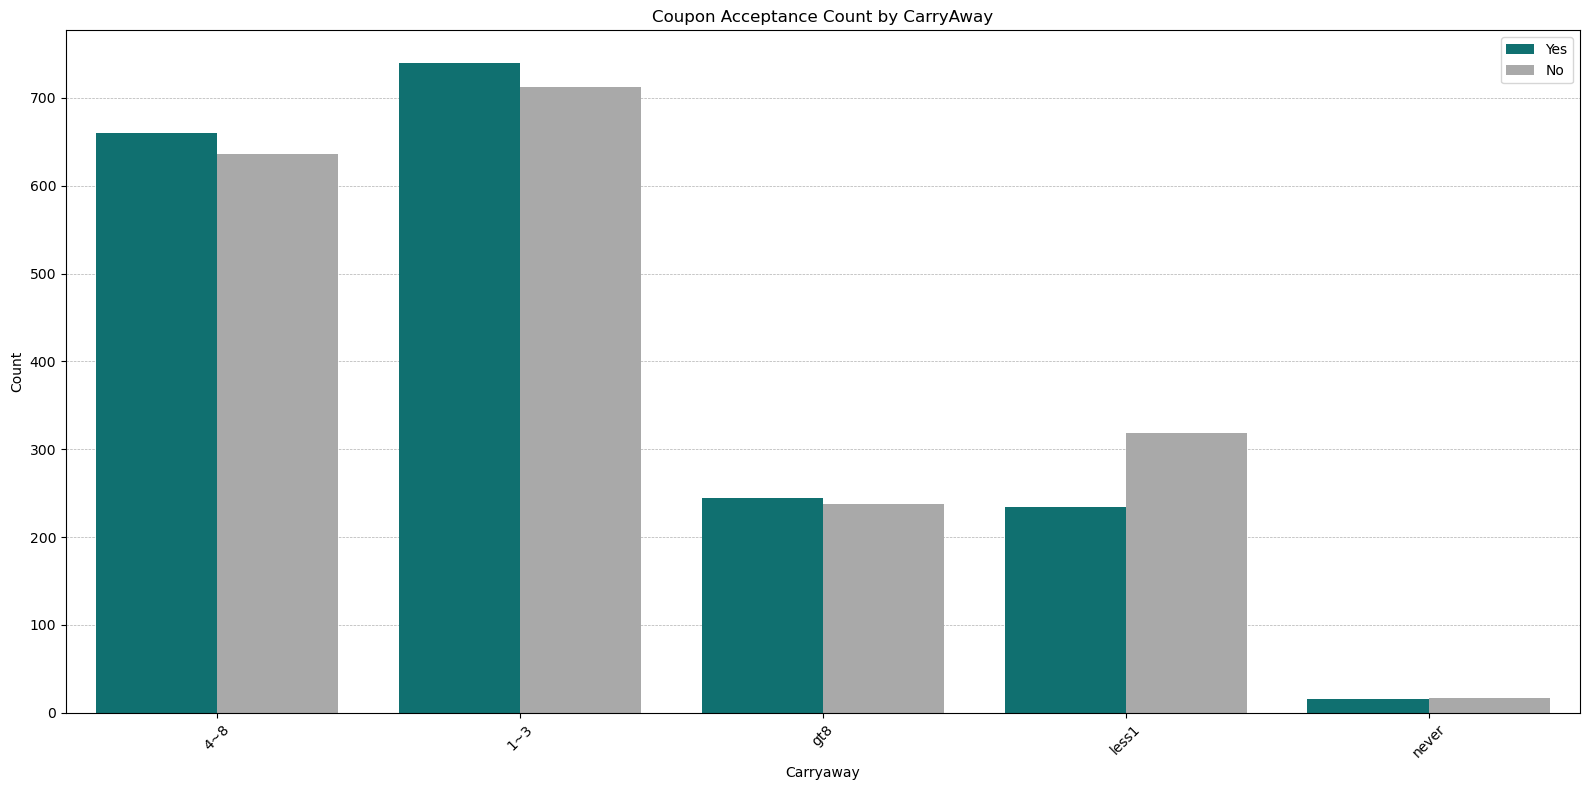

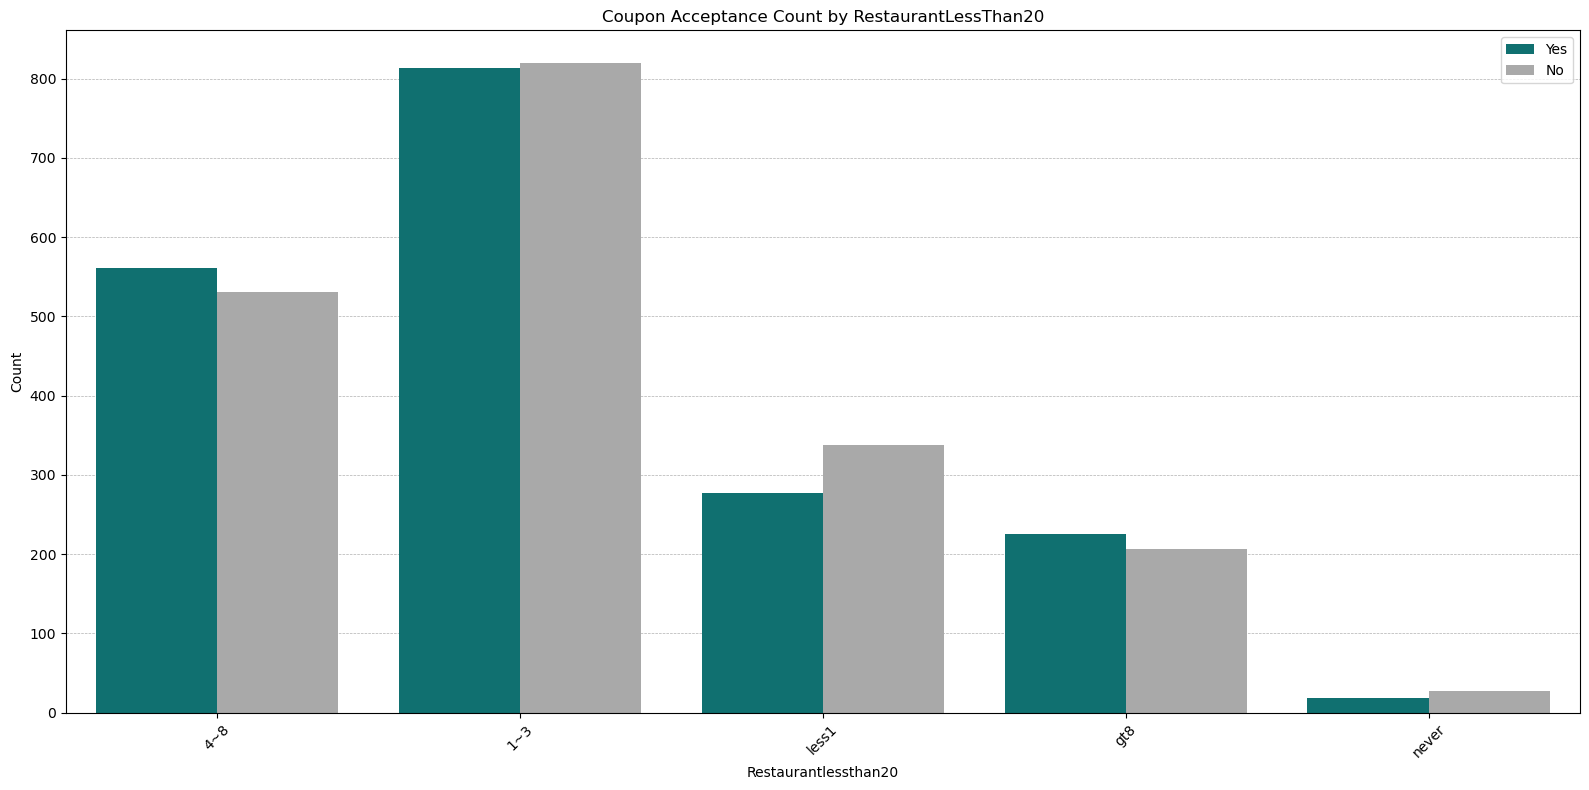

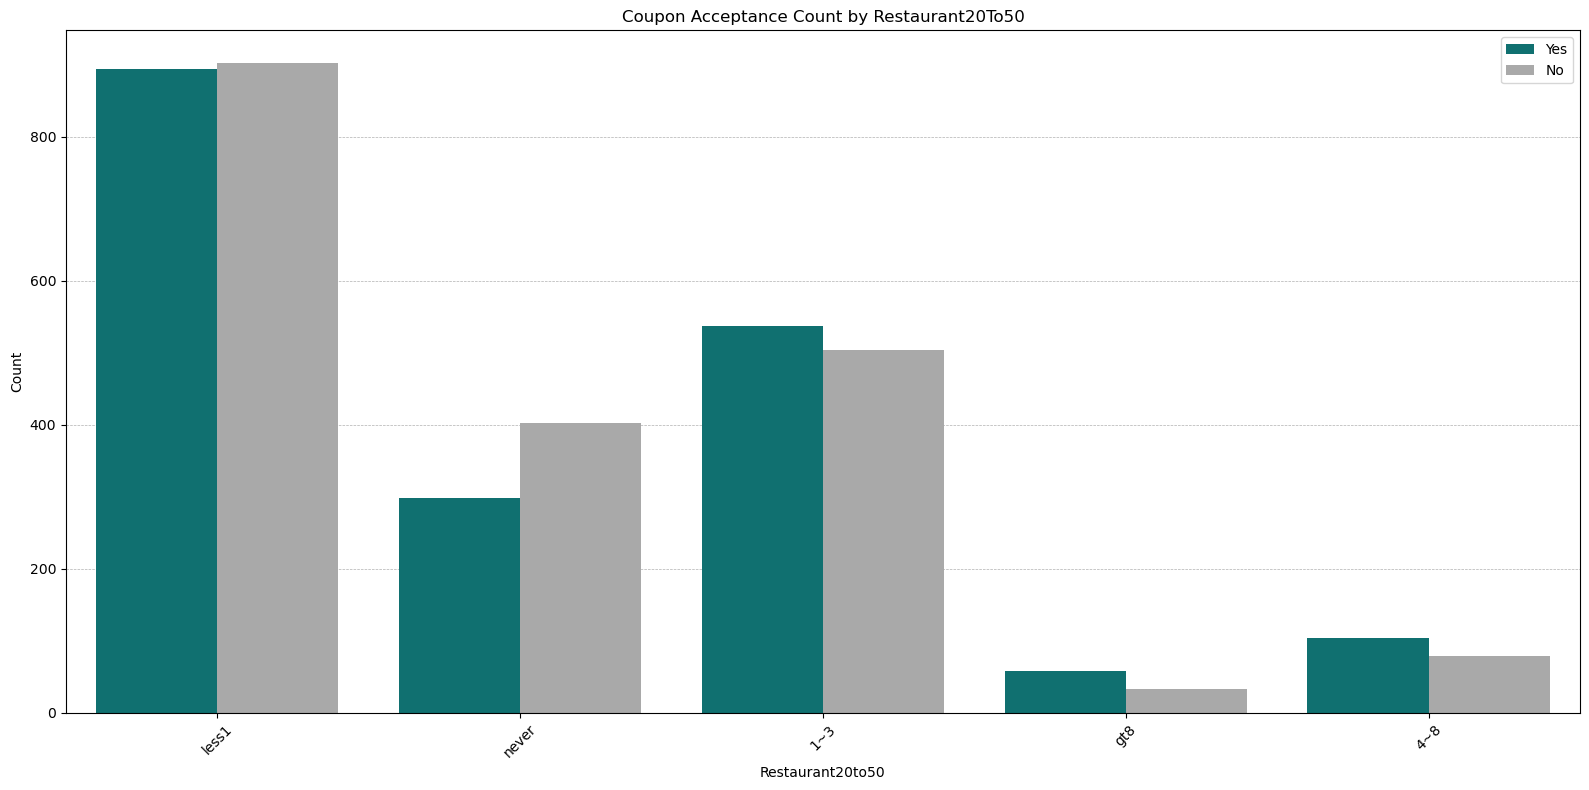

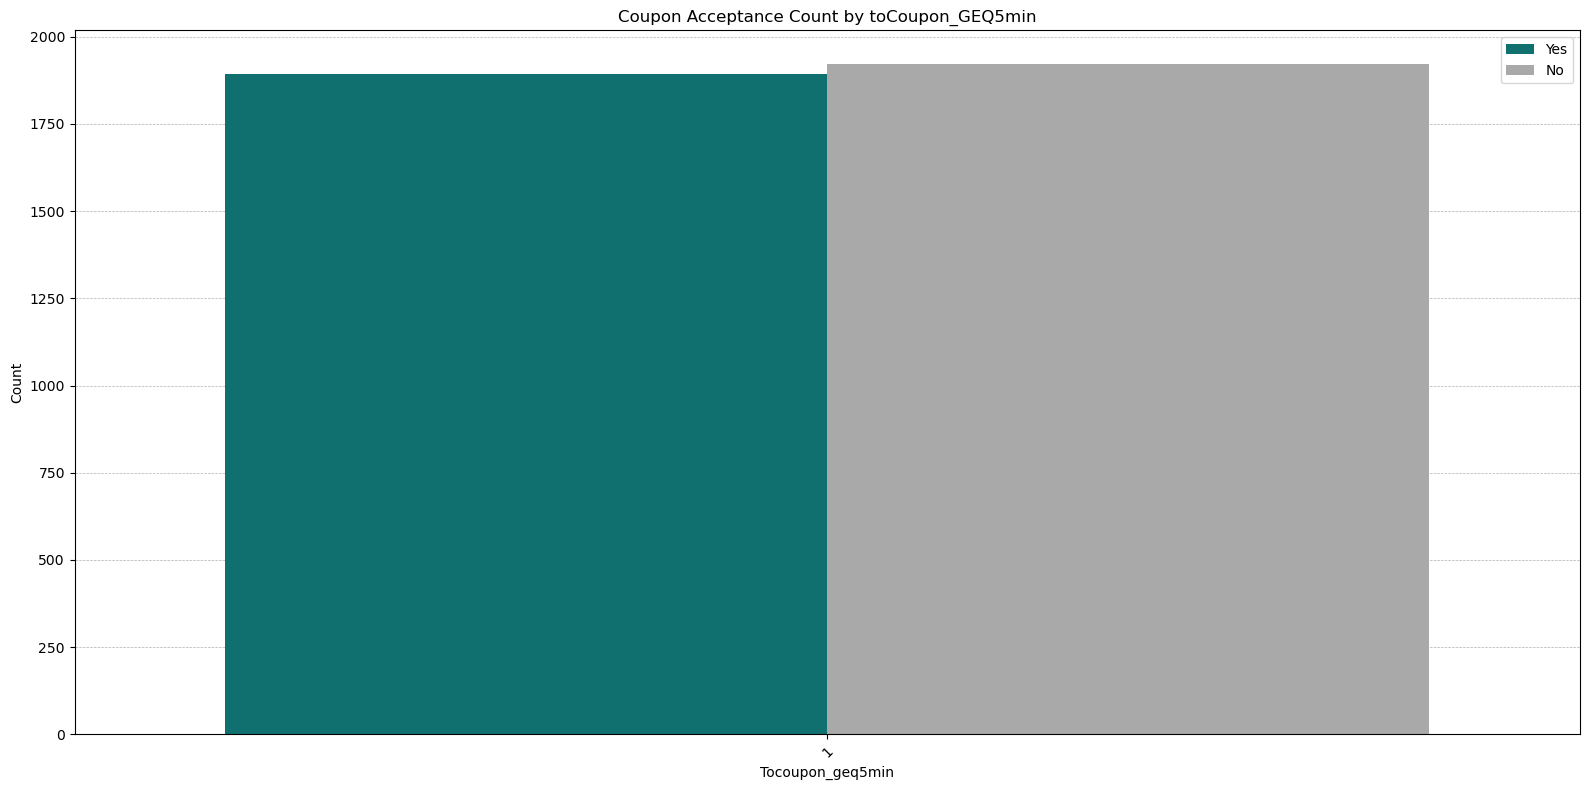

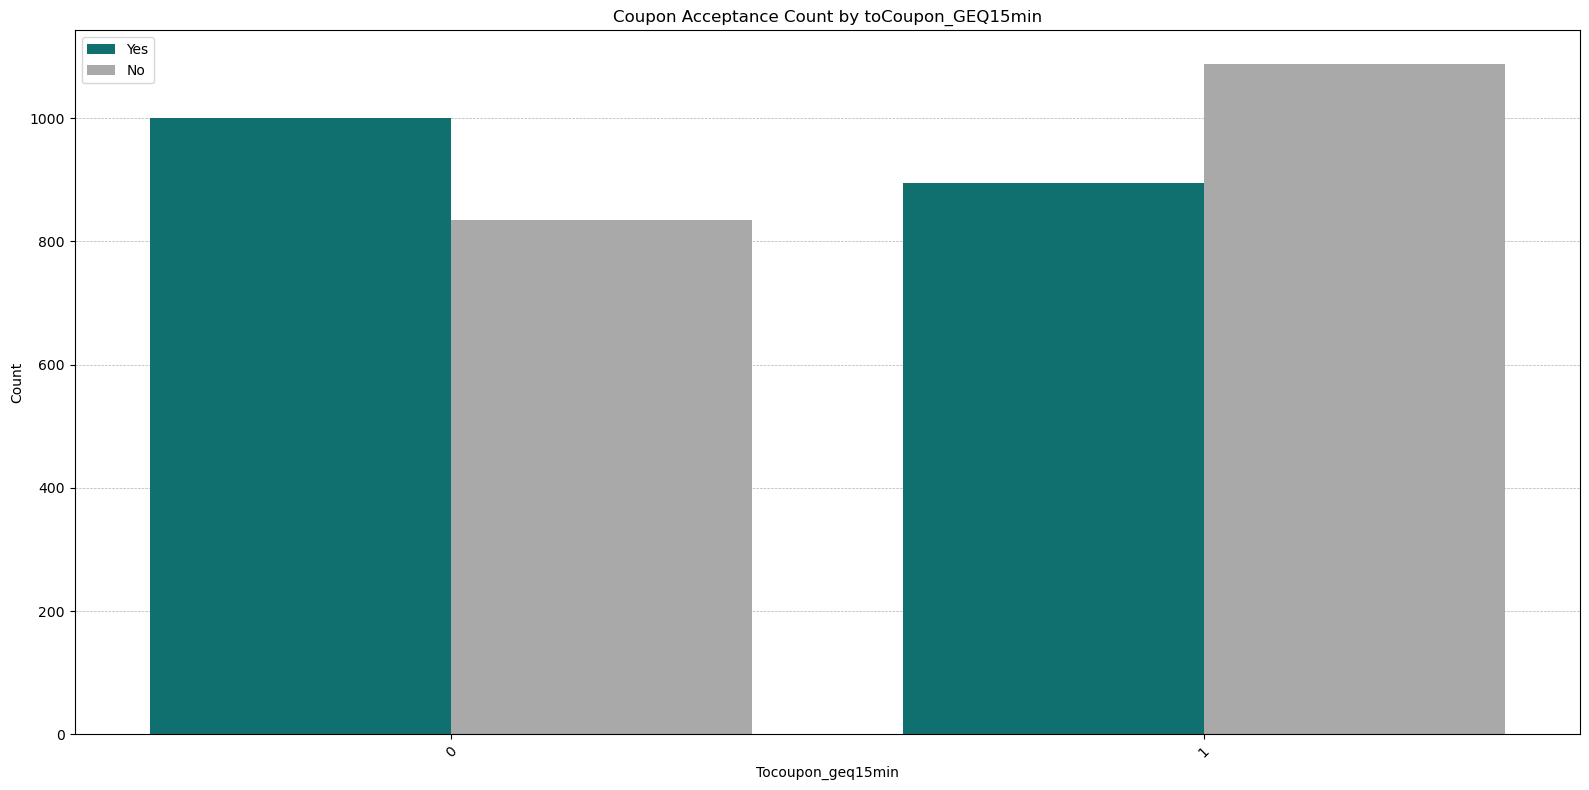

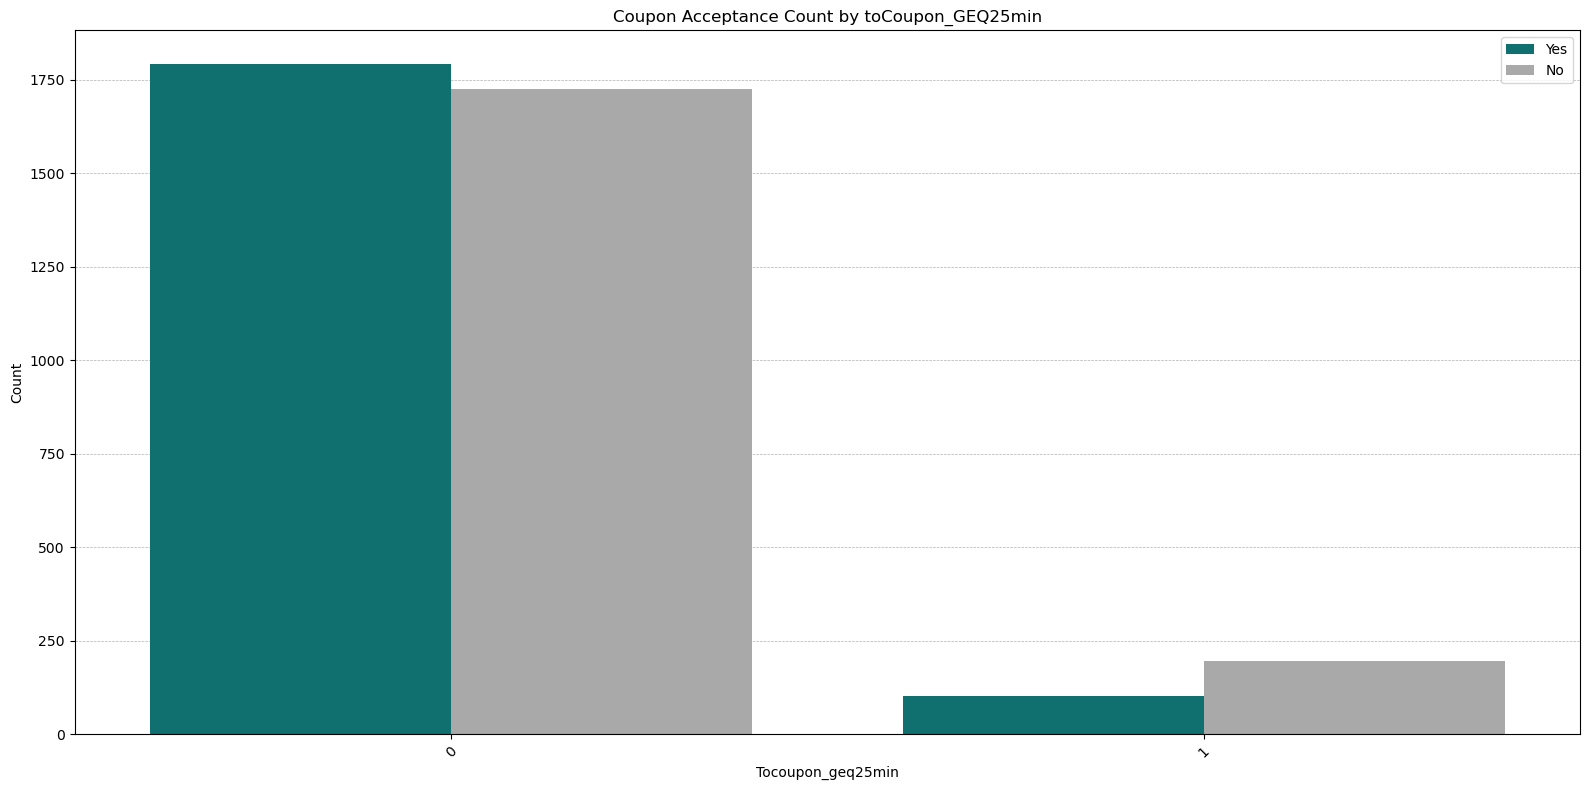

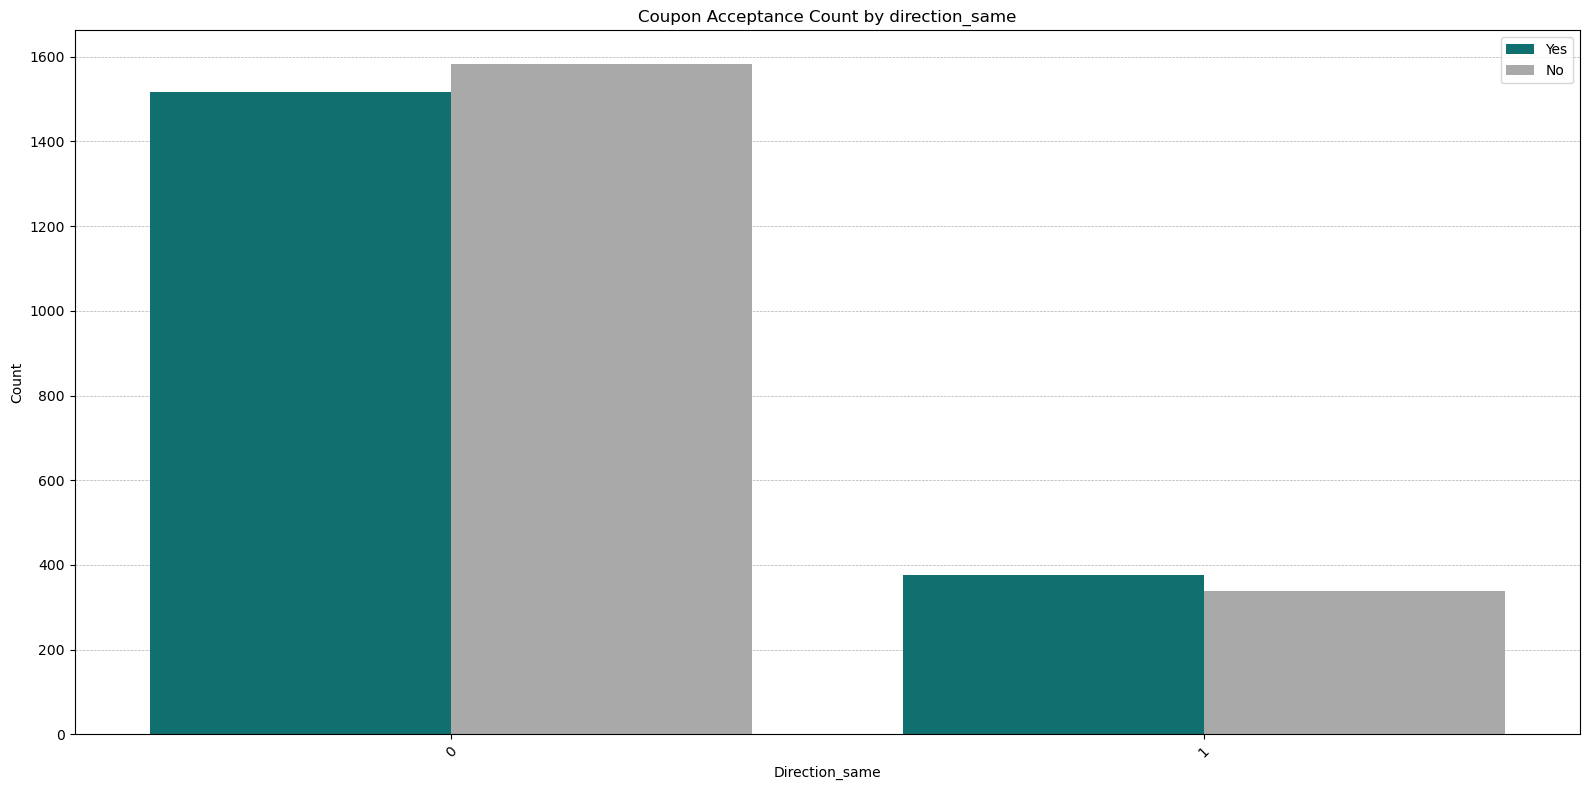

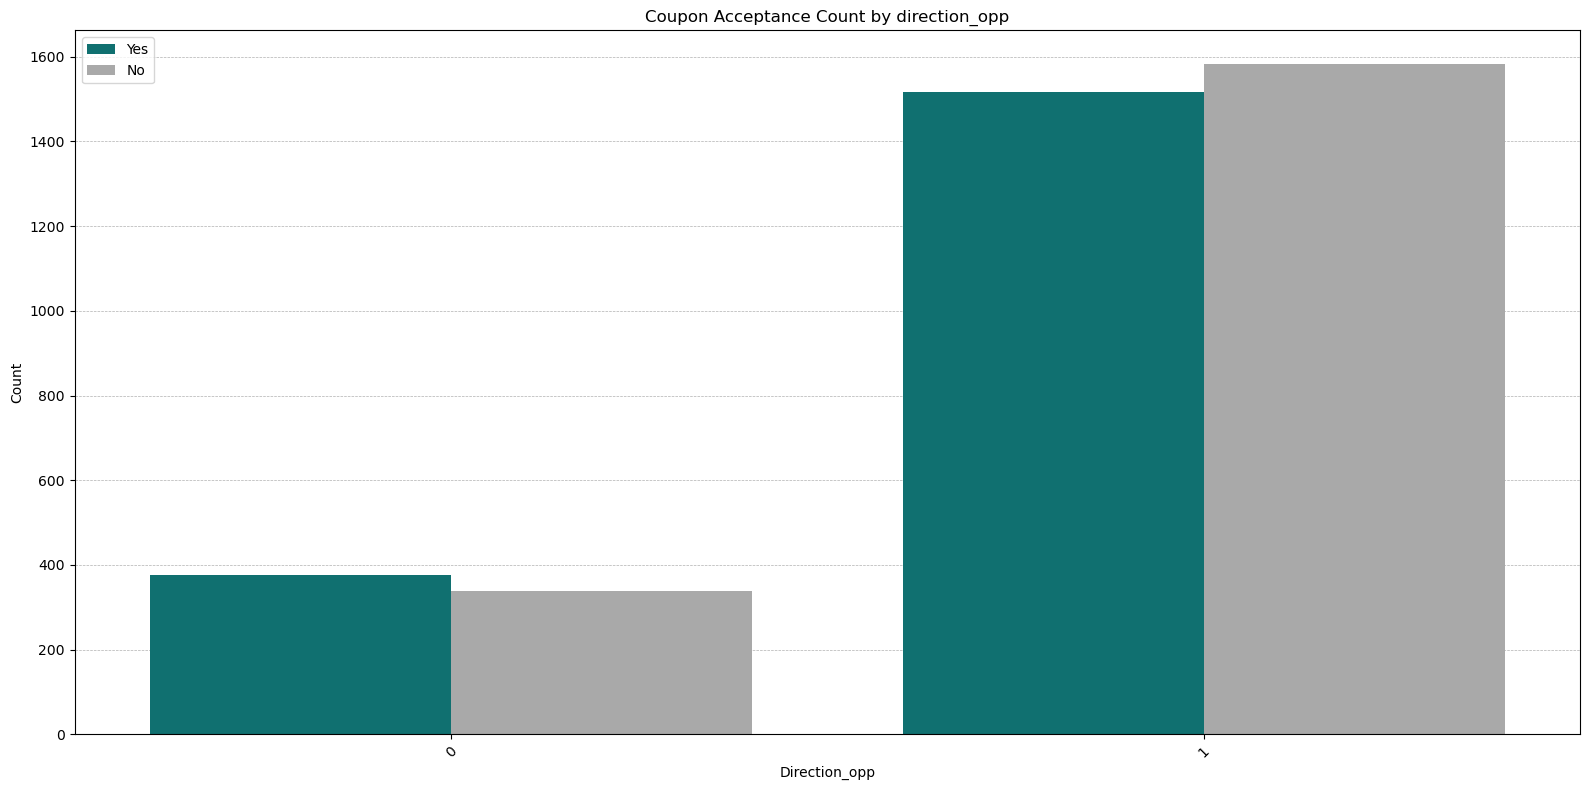

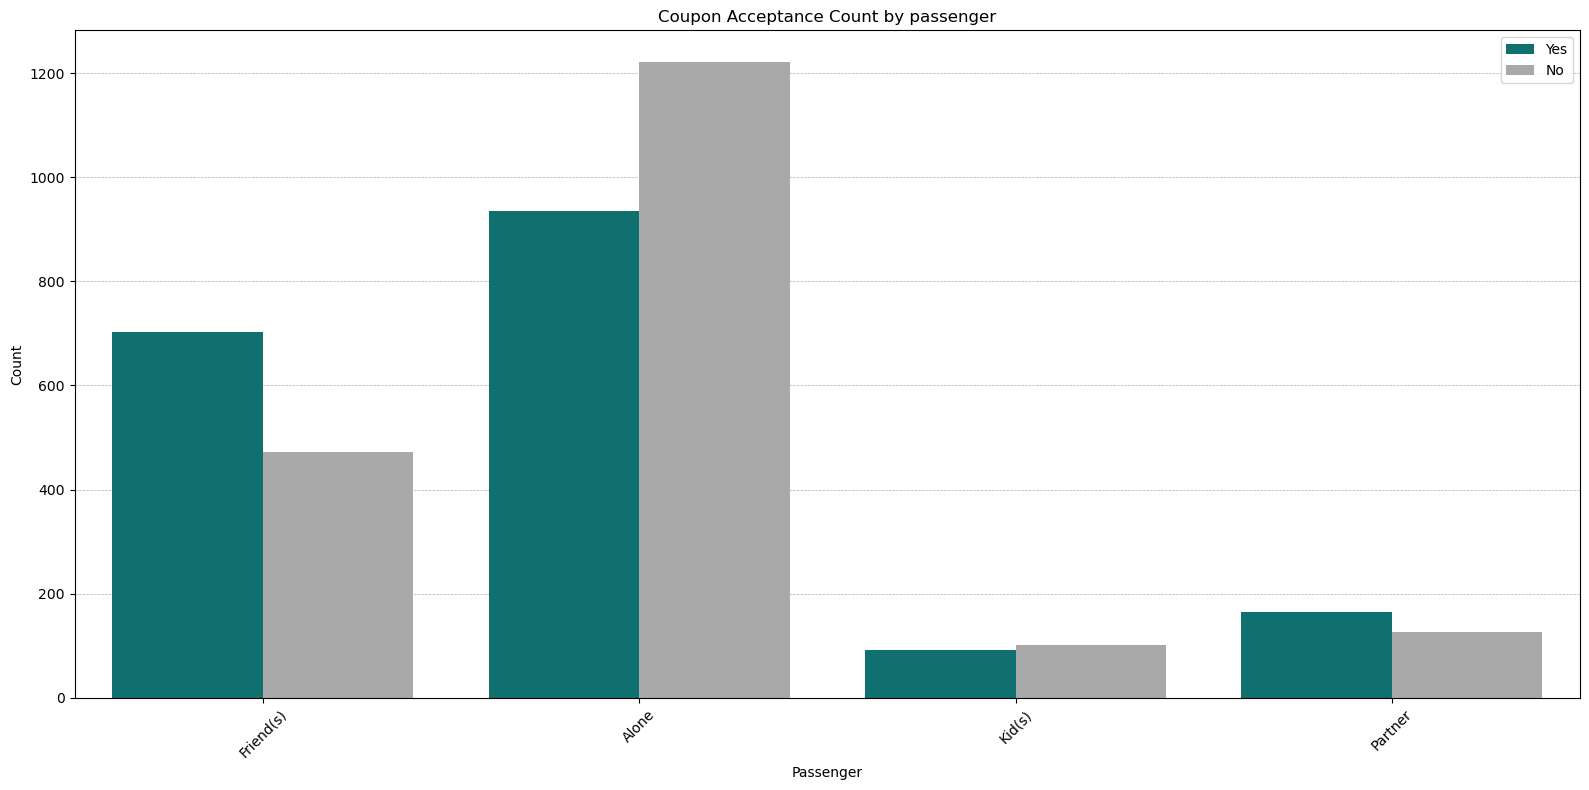

In [33]:
# due to the way that numerical columns have few unique values, they will be treated as categorical
categorical_columns = coffee_house_coupons.columns.drop('coupon').drop('Y').drop('temperature')

# have a "No" value color that is more muted
palette = {1: "teal", 0: "darkgray"}

for column in categorical_columns:
    num_categories = coffee_house_coupons[column].nunique()

    plot_width = max(16, num_categories)
    plot_height = plot_width / 2
    
    # scale the plot size based on the number of categories to avoid overlapping labels
    plt.figure(figsize=(plot_width, plot_height))
    countplot = sns.countplot(x=column, hue='Y', data=coffee_house_coupons, zorder=2, hue_order=[1, 0], palette=palette)
    title = f'Coupon Acceptance Count by {column}'
    plt.title(title)
    plt.xlabel(column.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(axis='y', which='both', linestyle='--', linewidth=0.5)

    # Remove the legend title and rename the labels
    handles, labels = countplot.get_legend_handles_labels()
    labels = ['No' if label == '0' else 'Yes' for label in labels]
    countplot.legend(handles=handles, labels=labels, title='')

    # save for use in the report
    plt.savefig(f'plots/{title}.png')
    plt.show()

In [22]:
# Coffee House coupons appear to be preferred:
# - when it is earlier in the day
print(f"late morning or early afternoon: {coffee_house_coupons[coffee_house_coupons['time'].isin(['10AM', '2PM'])]['Y'].mean() * 100:.0f}%")
# - when a user is not alone and not with kids
print(f"not alone and not with kids: {coffee_house_coupons[coffee_house_coupons['passenger'].isin(['Friend(s)', 'Partner'])]['Y'].mean() * 100:.0f}%")
# - when the user is on a leisure trip rather than driving to work or home
print(f"leisure trip: {coffee_house_coupons[coffee_house_coupons['destination'] == 'No Urgent Place']['Y'].mean() * 100:.0f}%")
# - when the user is known to frequent coffee houses
print(f"known to frequent coffee houses: {coffee_house_coupons[coffee_house_coupons['CoffeeHouse'].isin(['4~8', 'gt8'])]['Y'].mean() * 100:.0f}%")
# - by students and unemployed individuals
print(f"students and unemployed individuals: {coffee_house_coupons[coffee_house_coupons['occupation'].isin(['Student', 'Unemployed'])]['Y'].mean() * 100:.0f}%")
# - when the expiration is a day rather than 2 hours
print(f"expiration is a day: {coffee_house_coupons[coffee_house_coupons['expiration'] == '1d']['Y'].mean() * 100:.0f}%")

late morning or early afternoon: 59%
not alone and not with kids: 59%
leisure trip: 58%
known to frequent coffee houses: 67%
students and unemployed individuals: 57%
expiration is a day: 58%
